# Tarımda Tahminsel Modelleme: En Uygun Ürün Seçimi

## 1. Veri Anlama ve Keşifsel Veri Analizi

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Görselleştirme ayarları
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette('viridis')

# Uyarı mesajlarını kapatma
import warnings
warnings.filterwarnings('ignore')

# Türkçe karakterler için
plt.rcParams['axes.unicode_minus'] = False

# Veri setinin yüklenmesi
df = pd.read_csv('data/Crop_recommendation.csv')

# Veri setinin boyutu
print(f"Veri seti boyutu: {df.shape}")

# İlk 5 satırı görüntüleme
df.head()

Veri seti boyutu: (2200, 8)


N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [39]:
# Veri seti hakkında genel bilgi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [40]:
# Veri setinin istatistiksel özeti
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

Benzersiz bitki türü sayısı: 22


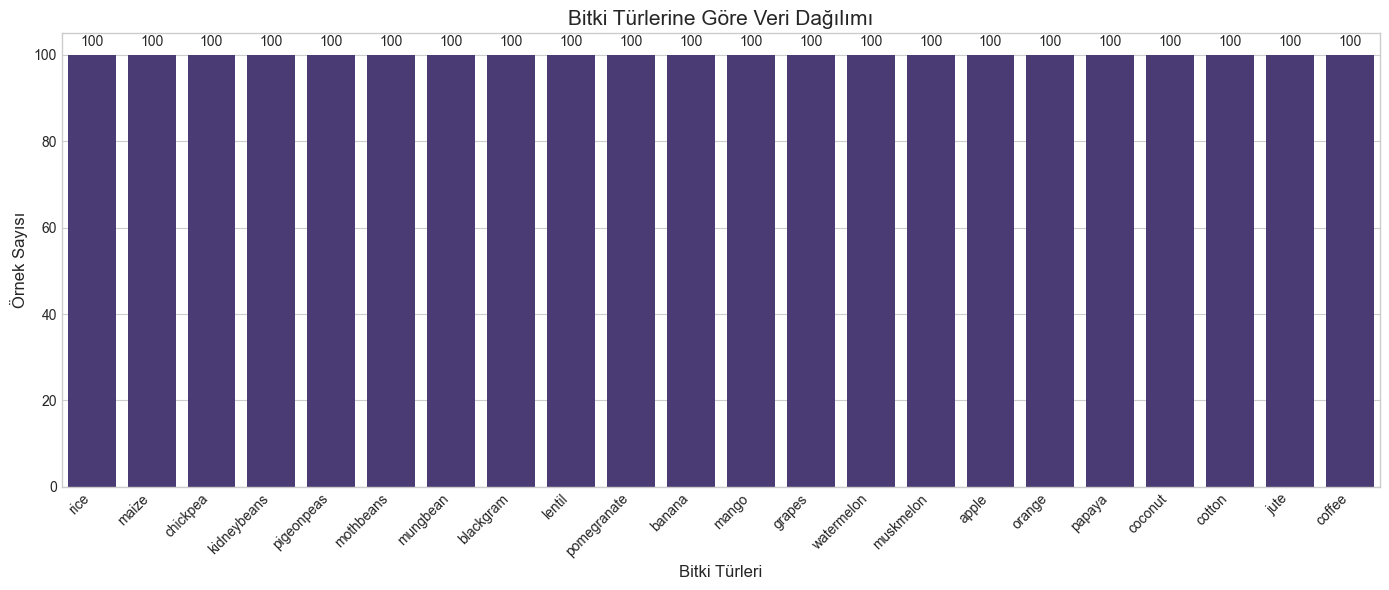

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [41]:
# Veri setindeki sınıf dağılımı
print(f"Benzersiz bitki türü sayısı: {df['label'].nunique()}")

# Sınıf dağılımının görselleştirilmesi
plt.figure(figsize=(14, 6))
crop_counts = df['label'].value_counts()
ax = sns.barplot(x=crop_counts.index, y=crop_counts.values)
plt.title('Bitki Türlerine Göre Veri Dağılımı', fontsize=15)
plt.xlabel('Bitki Türleri', fontsize=12)
plt.ylabel('Örnek Sayısı', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Sayıları grafik üzerinde gösterme
for i, count in enumerate(crop_counts.values):
    ax.text(i, count + 2, str(count), ha='center')

plt.show()

# Her bir sınıfın veri sayısı
df['label'].value_counts()

In [42]:
# Numerik değişkenlerin dağılım bilgileri
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Her bir değişkenin min, max ve benzersiz değer sayısı
for col in numeric_cols:
    if col != 'label':  # label sütununu hariç tut
        print(f"{col} - Min: {df[col].min()}, Max: {df[col].max()}, Benzersiz Değer: {df[col].nunique()}")

N - Min: 0, Max: 140, Benzersiz Değer: 137
P - Min: 5, Max: 145, Benzersiz Değer: 117
K - Min: 5, Max: 205, Benzersiz Değer: 73
temperature - Min: 8.825674745, Max: 43.67549305, Benzersiz Değer: 2200
humidity - Min: 14.25803981, Max: 99.98187601, Benzersiz Değer: 2200
ph - Min: 3.504752314, Max: 9.93509073, Benzersiz Değer: 2200
rainfall - Min: 20.21126747, Max: 298.5601175, Benzersiz Değer: 2200


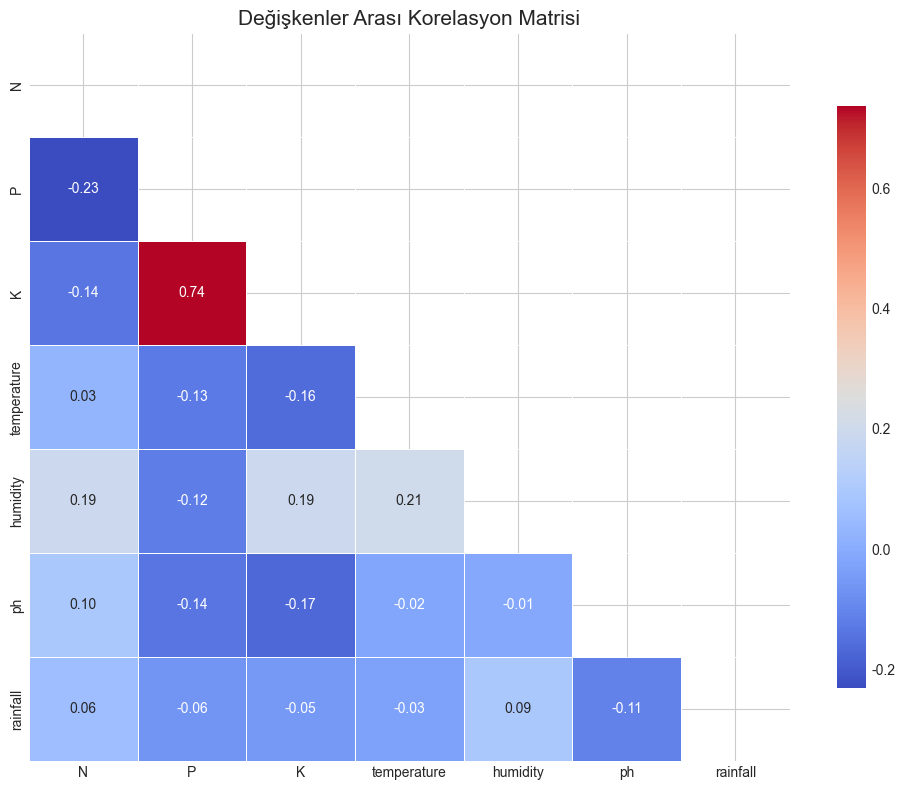

In [43]:
# Değişkenlerin korelasyonu
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=['float64', 'int64']).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Değişkenler Arası Korelasyon Matrisi', fontsize=15)
plt.tight_layout()
plt.show()

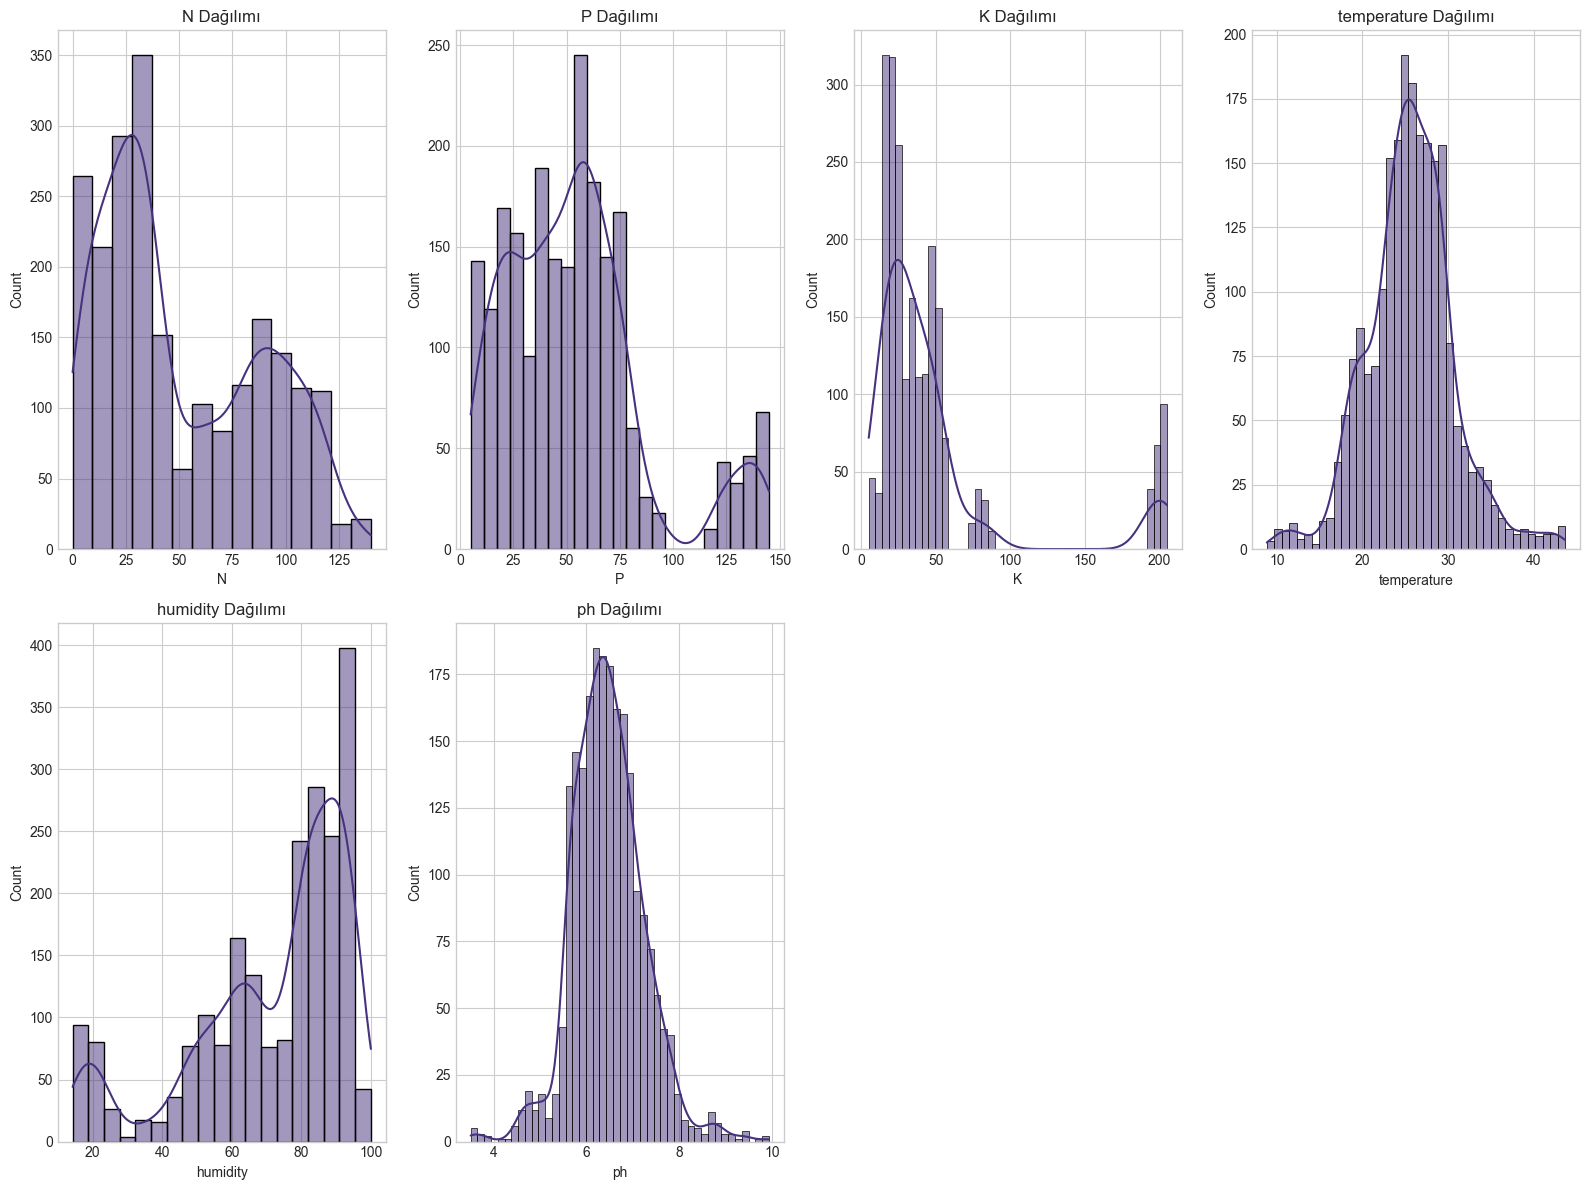

In [44]:
# Her bir değişkenin dağılımını görselleştirme
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols[:-1]):  # label hariç
    plt.subplot(2, 4, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Dağılımı')
    plt.tight_layout()
plt.show()

### Her Bitki Türü için Detaylı Analiz

Her bitki türü için özellik değerlerinin ortalama, minimum ve maksimum değerlerini inceleyerek, hangi koşullarda hangi bitkilerin yetiştirilmesinin daha uygun olduğunu anlayabiliriz.

In [45]:
# Her bitki türü için özellik istatistiklerini hesaplama
crop_features = {}

for crop in df['label'].unique():
    crop_df = df[df['label'] == crop]
    crop_features[crop] = {}
    
    for feature in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
        crop_features[crop][feature] = {
            'mean': crop_df[feature].mean(),
            'min': crop_df[feature].min(),
            'max': crop_df[feature].max(),
            'std': crop_df[feature].std()
        }

# İlk bitki türü için örnek gösterim
example_crop = list(crop_features.keys())[0]
print(f"Örnek Bitki: {example_crop}")

for feature, stats in crop_features[example_crop].items():
    print(f"\n{feature}:")
    for stat_name, stat_value in stats.items():
        print(f"  {stat_name}: {stat_value:.2f}")

Örnek Bitki: rice

N:
  mean: 79.89
  min: 60.00
  max: 99.00
  std: 11.92

P:
  mean: 47.58
  min: 35.00
  max: 60.00
  std: 7.90

K:
  mean: 39.87
  min: 35.00
  max: 45.00
  std: 2.95

temperature:
  mean: 23.69
  min: 20.05
  max: 26.93
  std: 2.03

humidity:
  mean: 82.27
  min: 80.12
  max: 84.97
  std: 1.42

ph:
  mean: 6.43
  min: 5.01
  max: 7.87
  std: 0.77

rainfall:
  mean: 236.18
  min: 182.56
  max: 298.56
  std: 34.29


In [46]:
# Her bitki türü için özelliklerin ortalamasını karşılaştırma
feature_means = pd.DataFrame({crop: {feature: crop_features[crop][feature]['mean'] 
                                   for feature in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']} 
                            for crop in crop_features}).T

# Sonuçları gösterme
feature_means

N       P       K  temperature   humidity        ph  \
rice          79.89   47.58   39.87    23.689332  82.272822  6.425471   
maize         77.76   48.44   19.79    22.389204  65.092249  6.245190   
chickpea      40.09   67.79   79.92    18.872847  16.860439  7.336957   
kidneybeans   20.75   67.54   20.05    20.115085  21.605357  5.749411   
pigeonpeas    20.73   67.73   20.29    27.741762  48.061633  5.794175   
mothbeans     21.44   48.01   20.23    28.194920  53.160418  6.831174   
mungbean      20.99   47.28   19.87    28.525775  85.499975  6.723957   
blackgram     40.02   67.47   19.24    29.973340  65.118426  7.133952   
lentil        18.77   68.36   19.41    24.509052  64.804785  6.927932   
pomegranate   18.87   18.75   40.21    21.837842  90.125504  6.429172   
banana       100.23   82.01   50.05    27.376798  80.358123  5.983893   
mango         20.07   27.18   29.92    31.208770  50.156573  5.766373   
grapes        23.18  132.53  200.11    23.849575  81.875228  6.025937   
watermelon    99.42   17.00   50.22    25.591767  85.160375  6.495778   
muskmelon    100.32   17.72   50.08    28.663066  92.342802  6.358805   
apple         20.80  134.22  199.89    22.630942  92.333383  5.929663   
orange        19.58   16.55   10.01    22.765725  92.170209  7.016957   
papaya        49.88   59.05   50.04    33.723859  92.403388  6.741442   
coconut       21.98   16.93   30.59    27.409892  94.844272  5.976562   
cotton       117.77   46.24   19.56    23.988958  79.843474  6.912675   
jute          78.40   46.86   39.99    24.958376  79.639864  6.732778   
coffee       101.20   28.74   29.94    25.540477  58.869846  6.790308   

               rainfall  
rice         236.181114  
maize         84.766988  
chickpea      80.058977  
kidneybeans  105.919778  
pigeonpeas   149.457564  
mothbeans     51.198487  
mungbean      48.403601  
blackgram     67.884151  
lentil        45.680454  
pomegranate  107.528442  
banana       104.626980  
mango         94.704515  
grapes        69.611829  
watermelon    50.786219  
muskmelon     24.689952  
apple        112.654779  
orange       110.474969  
papaya       142.627839  
coconut      175.686646  
cotton        80.398043  
jute         174.792798  
coffee       158.066295

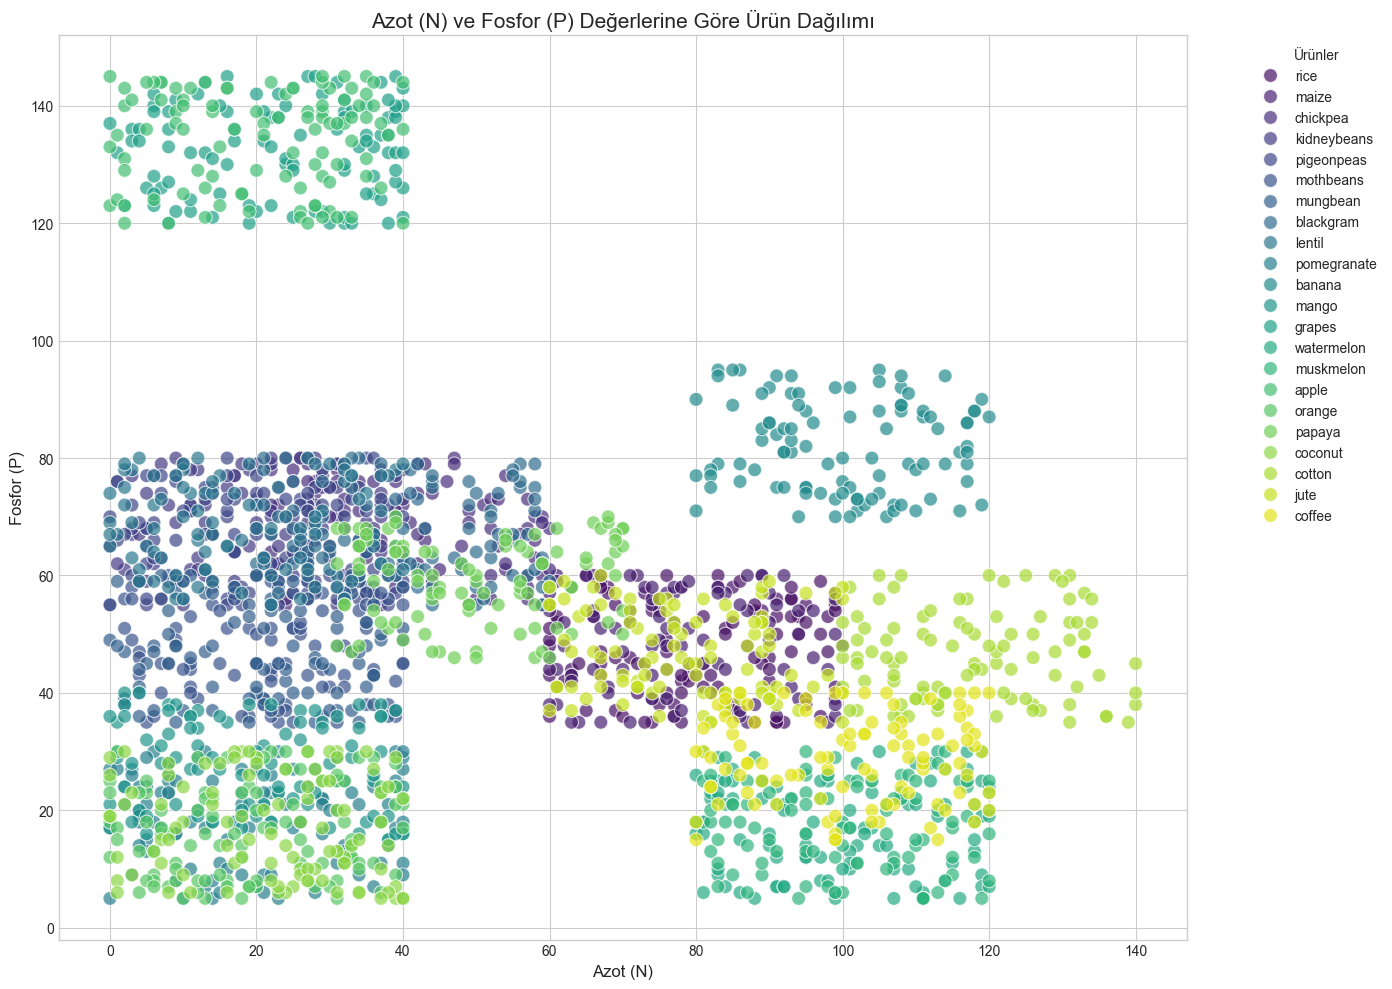

In [47]:
# Bitki türlerine göre özellikler arasındaki ilişkiyi görselleştirme - Çift değişkenli analiz
# N ve P değerlerine göre ürün dağılımı
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df, x='N', y='P', hue='label', palette='viridis', s=100, alpha=0.7)
plt.title('Azot (N) ve Fosfor (P) Değerlerine Göre Ürün Dağılımı', fontsize=15)
plt.xlabel('Azot (N)', fontsize=12)
plt.ylabel('Fosfor (P)', fontsize=12)
plt.legend(title='Ürünler', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

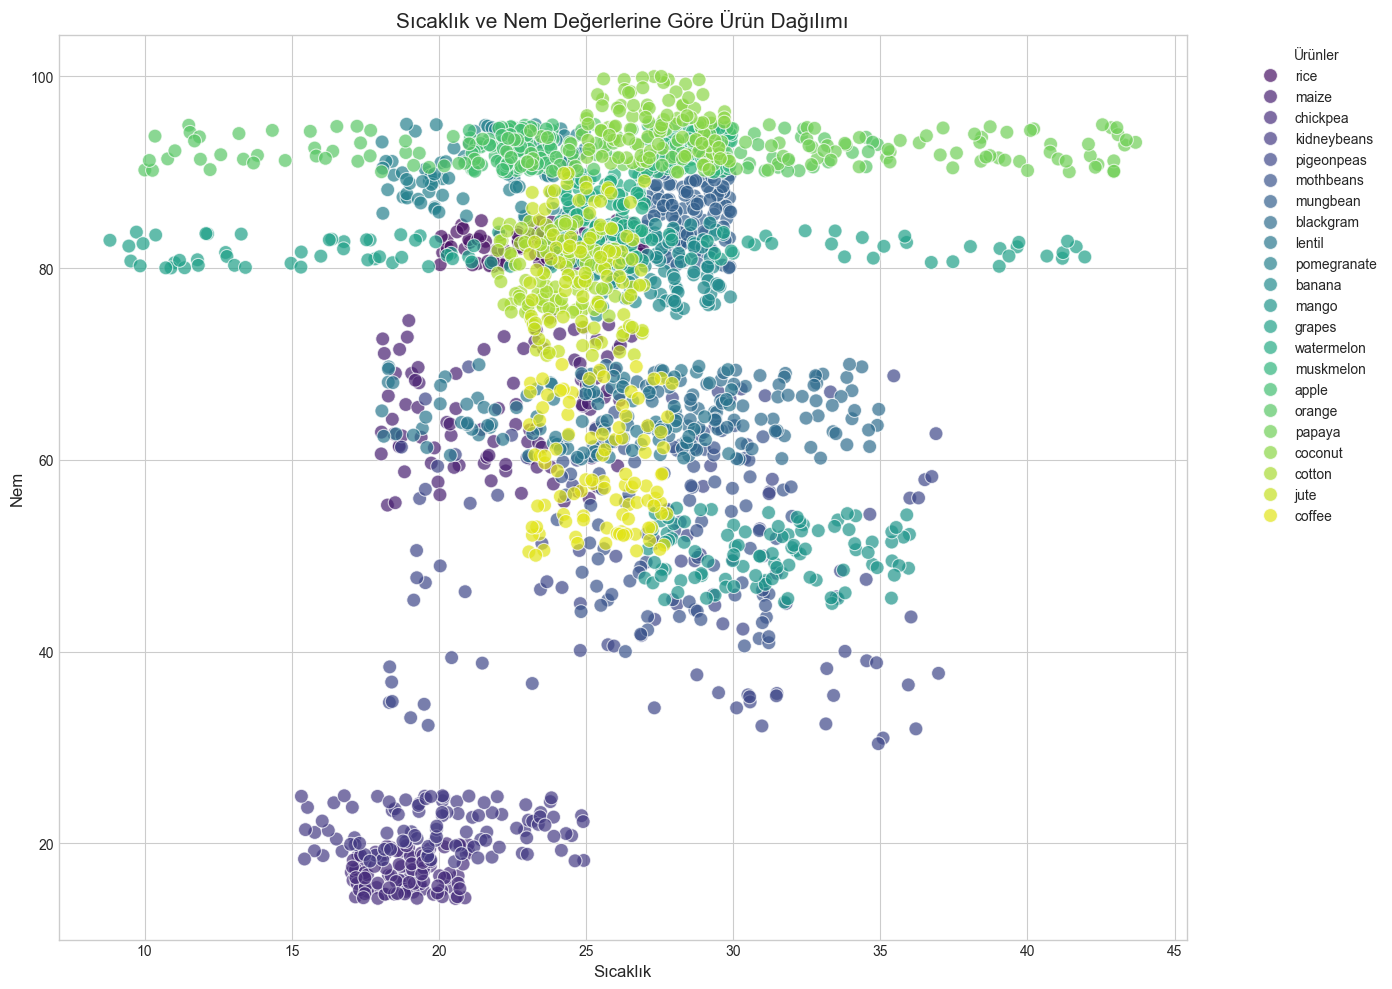

In [48]:
# Sıcaklık ve Nem değerlerine göre ürün dağılımı
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df, x='temperature', y='humidity', hue='label', palette='viridis', s=100, alpha=0.7)
plt.title('Sıcaklık ve Nem Değerlerine Göre Ürün Dağılımı', fontsize=15)
plt.xlabel('Sıcaklık', fontsize=12)
plt.ylabel('Nem', fontsize=12)
plt.legend(title='Ürünler', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

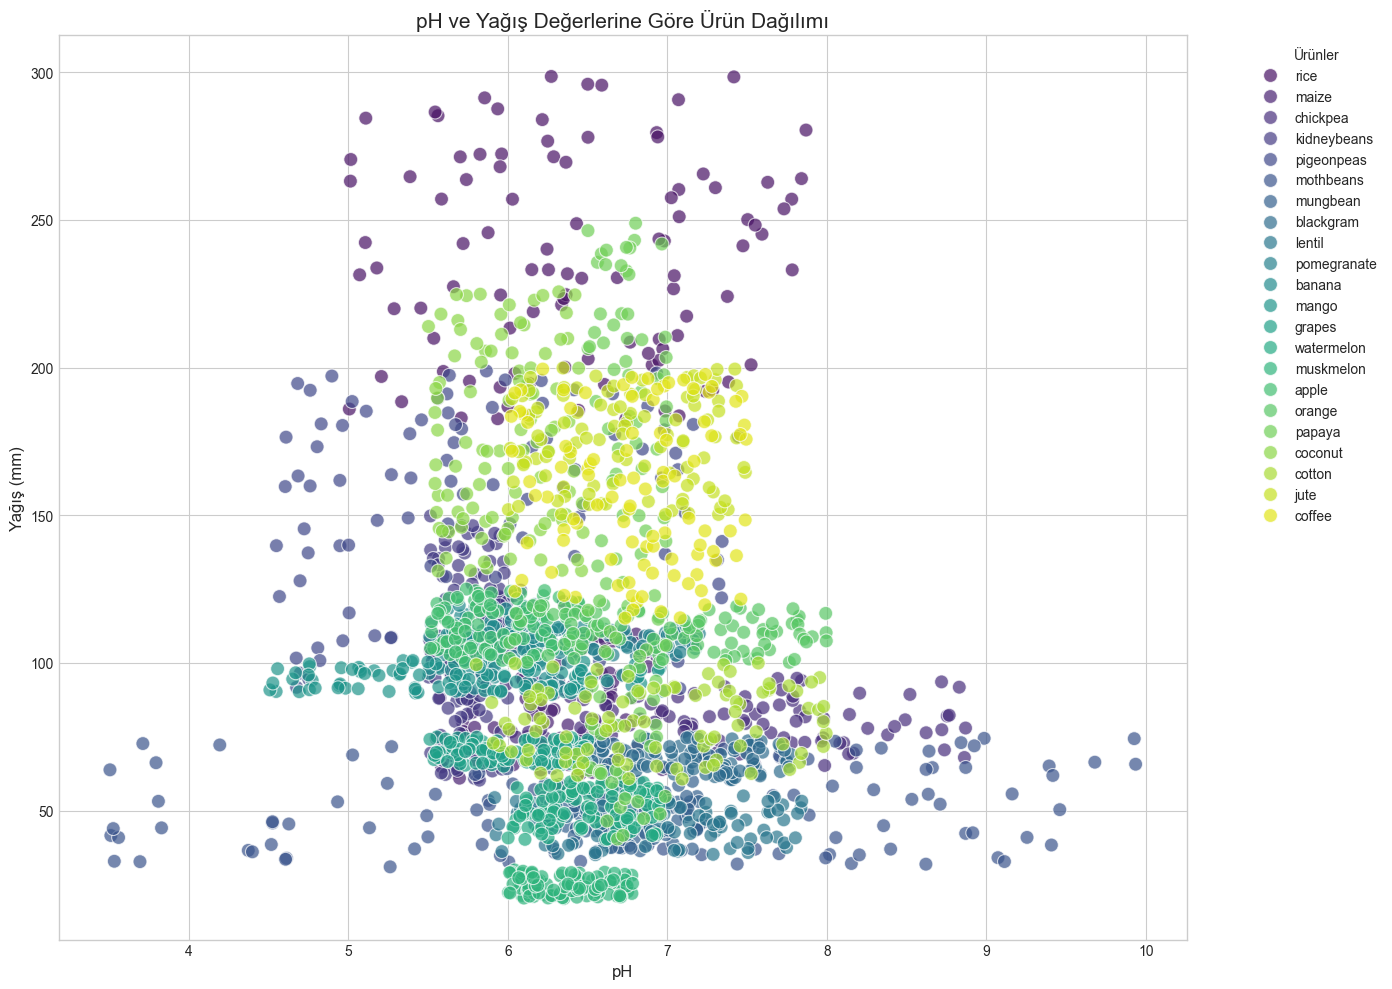

In [49]:
# pH ve Yağış değerlerine göre ürün dağılımı
plt.figure(figsize=(14, 10))
sns.scatterplot(data=df, x='ph', y='rainfall', hue='label', palette='viridis', s=100, alpha=0.7)
plt.title('pH ve Yağış Değerlerine Göre Ürün Dağılımı', fontsize=15)
plt.xlabel('pH', fontsize=12)
plt.ylabel('Yağış (mm)', fontsize=12)
plt.legend(title='Ürünler', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

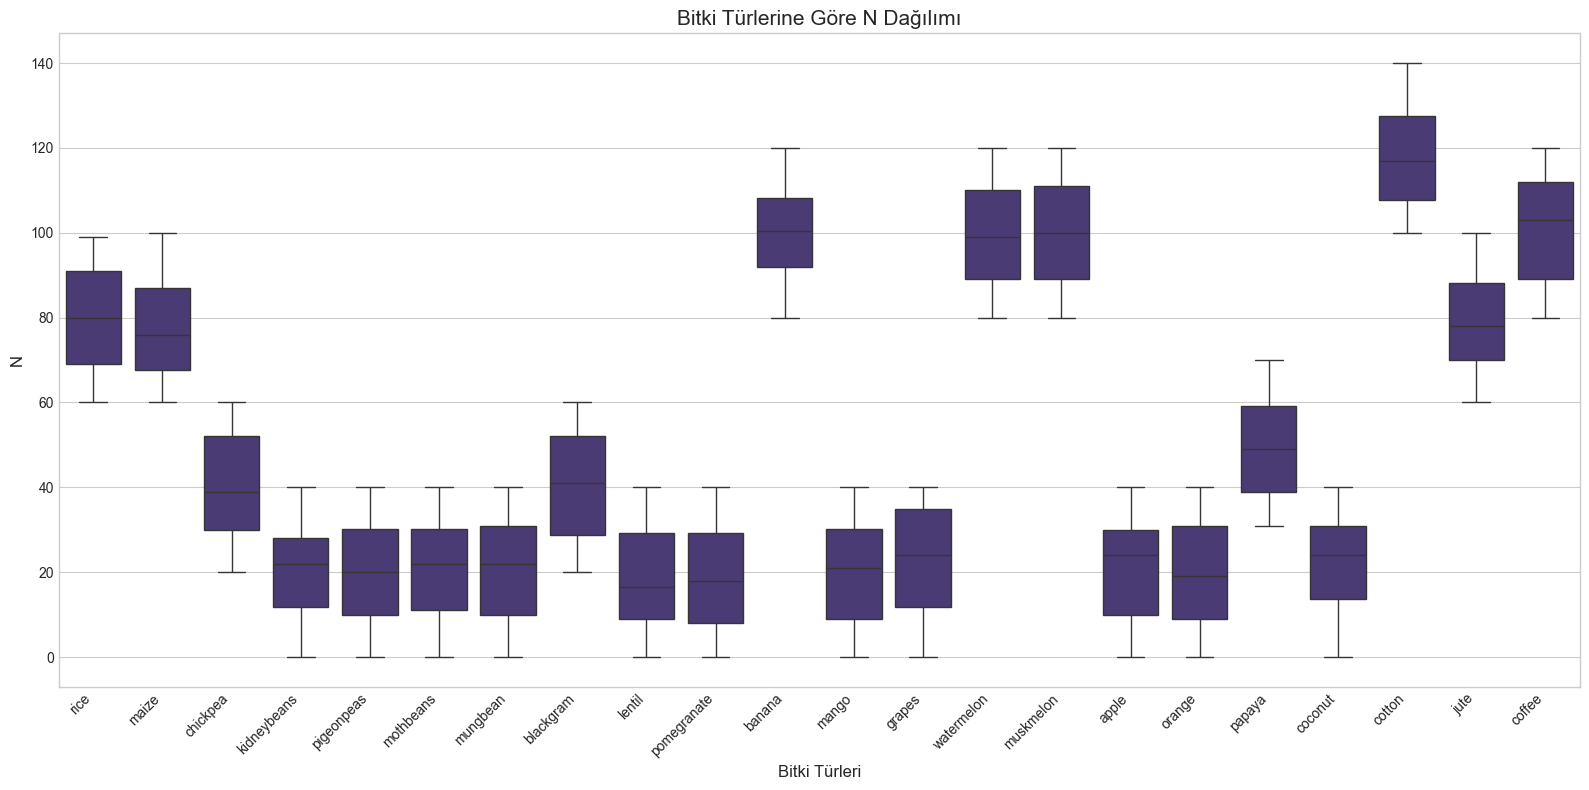

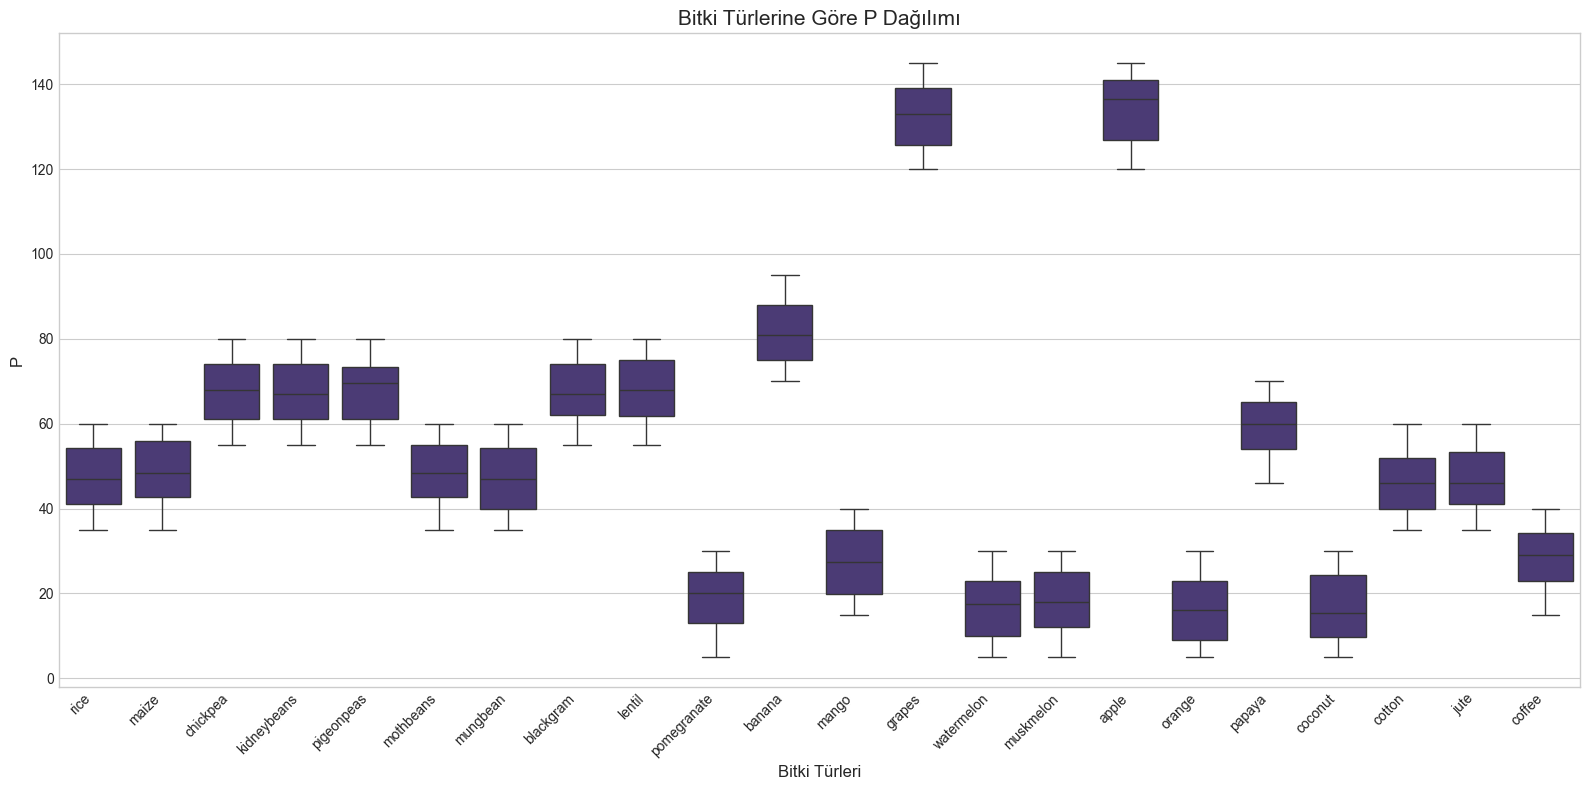

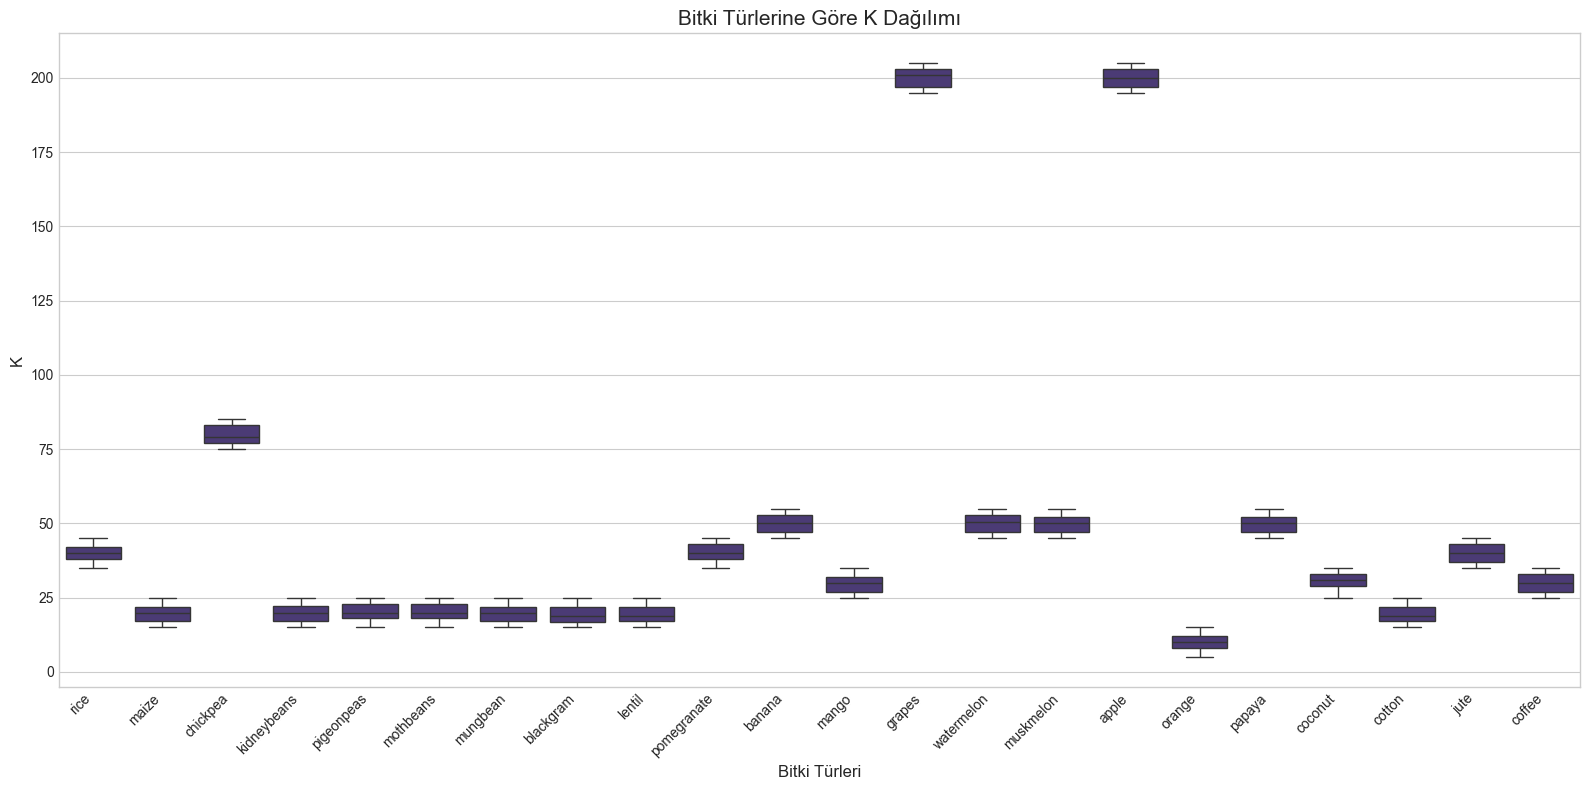

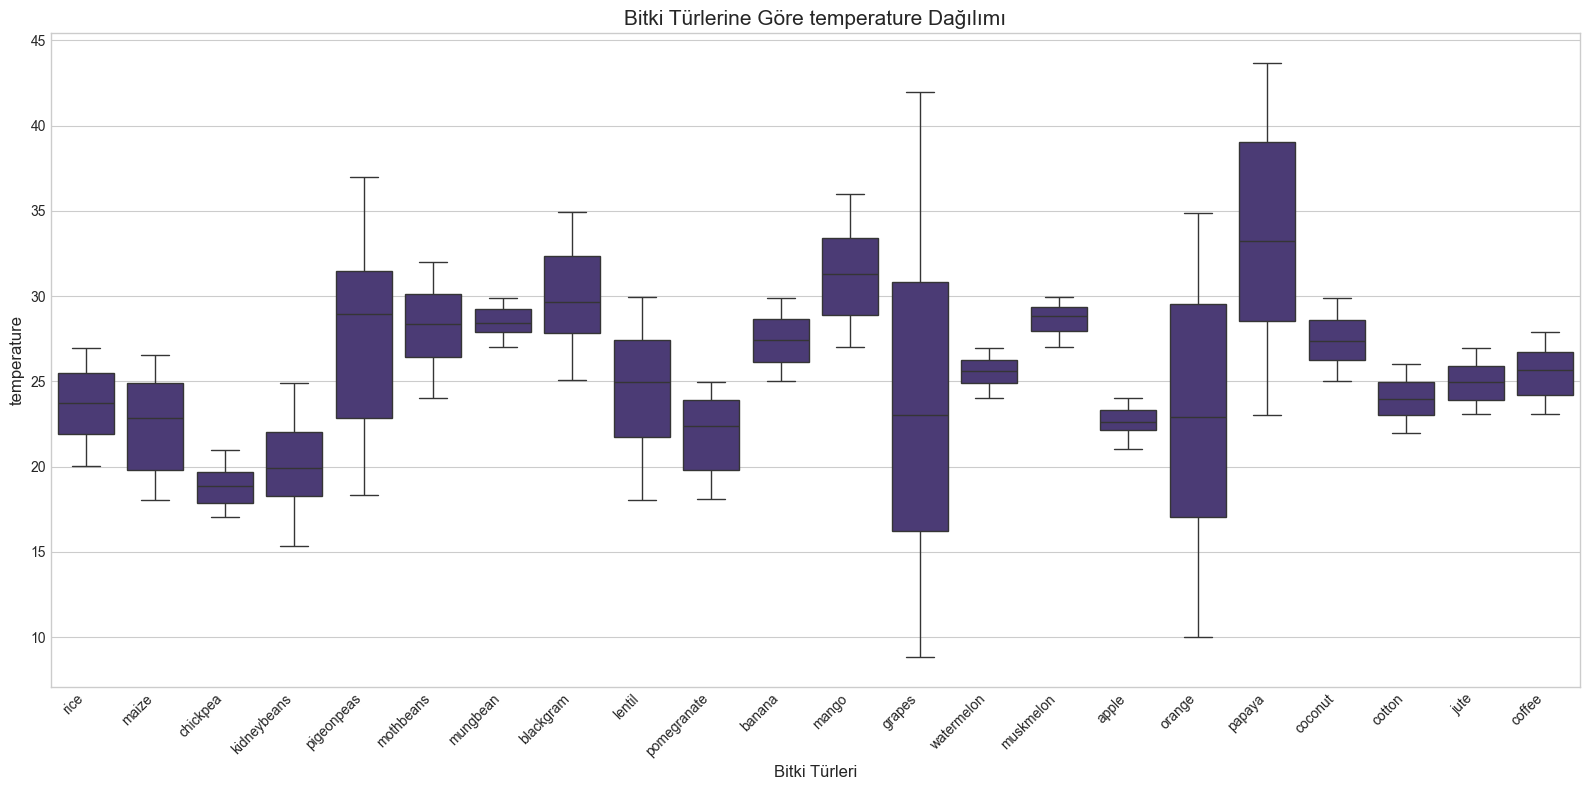

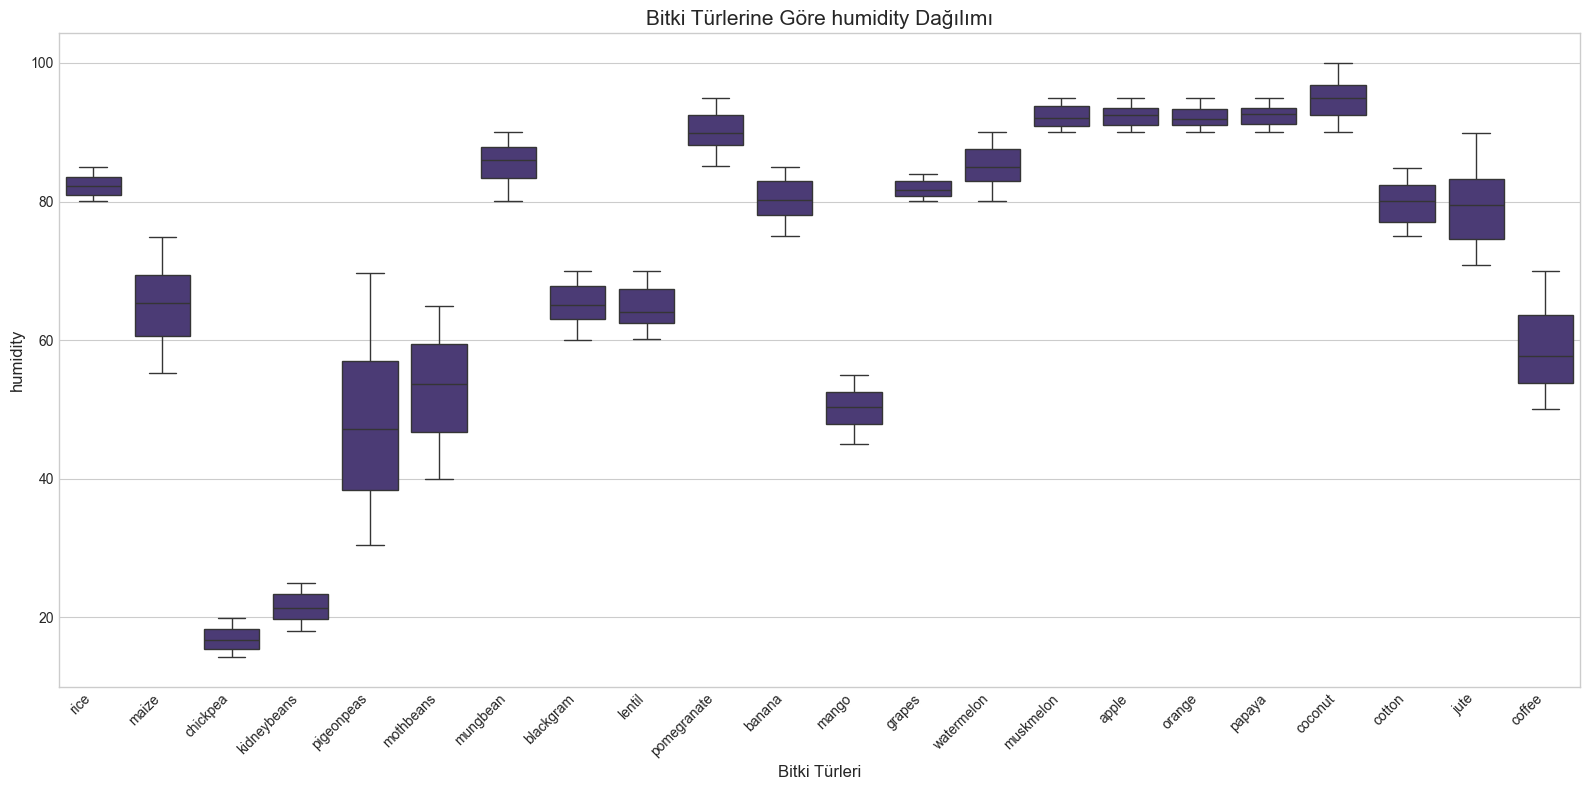

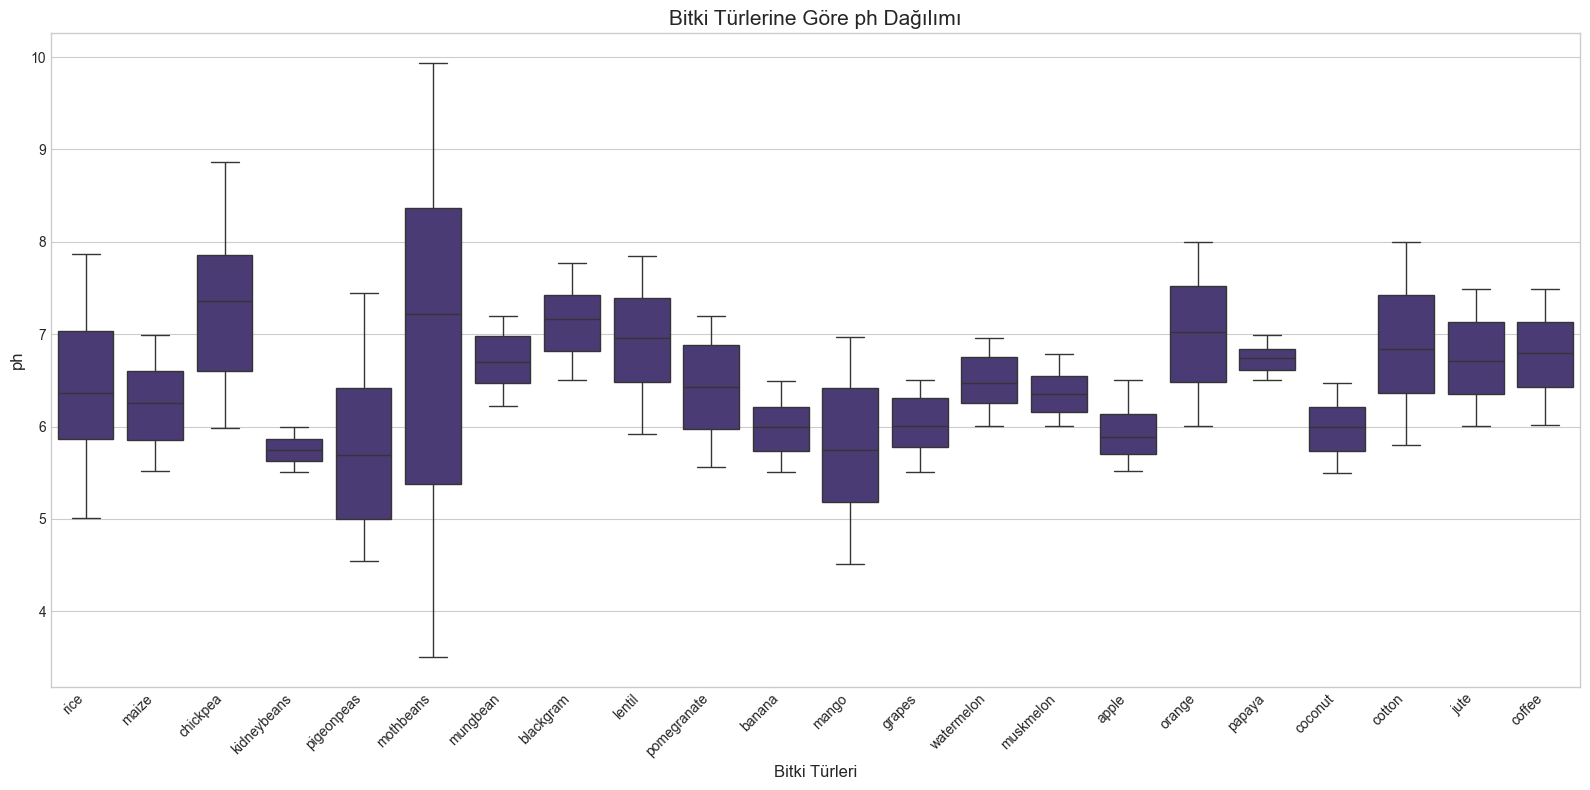

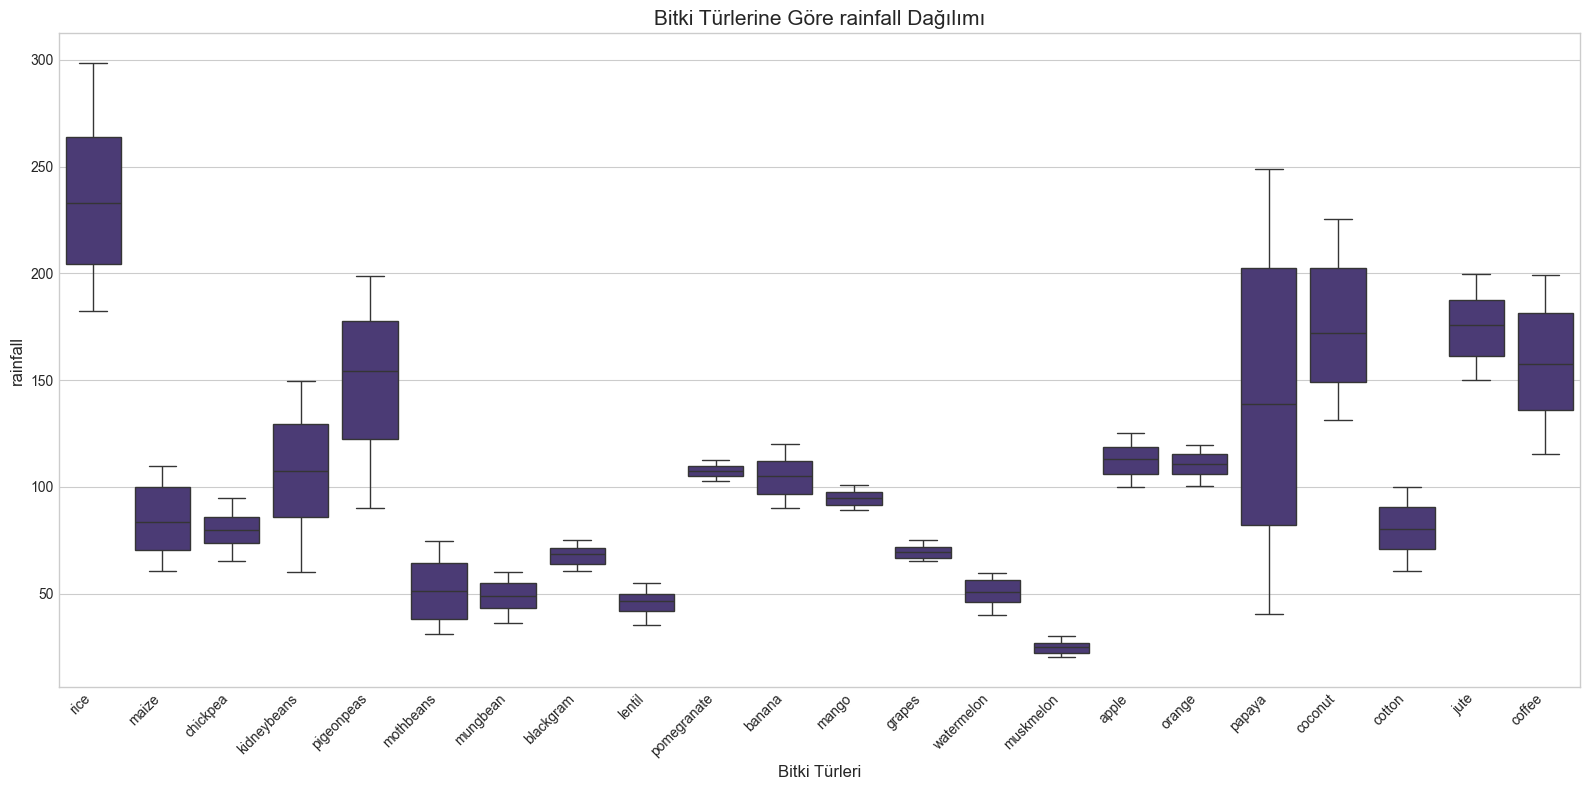

In [50]:
# Her özellik için bitki türlerine göre kutu grafiği oluşturma
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

for feature in features:
    plt.figure(figsize=(16, 8))
    ax = sns.boxplot(x='label', y=feature, data=df)
    plt.title(f'Bitki Türlerine Göre {feature} Dağılımı', fontsize=15)
    plt.xlabel('Bitki Türleri', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Çok Boyutlu Veri Görselleştirme

Verilerin çok boyutlu yapısını daha iyi anlamak için ileri görselleştirme tekniklerini kullanalım.

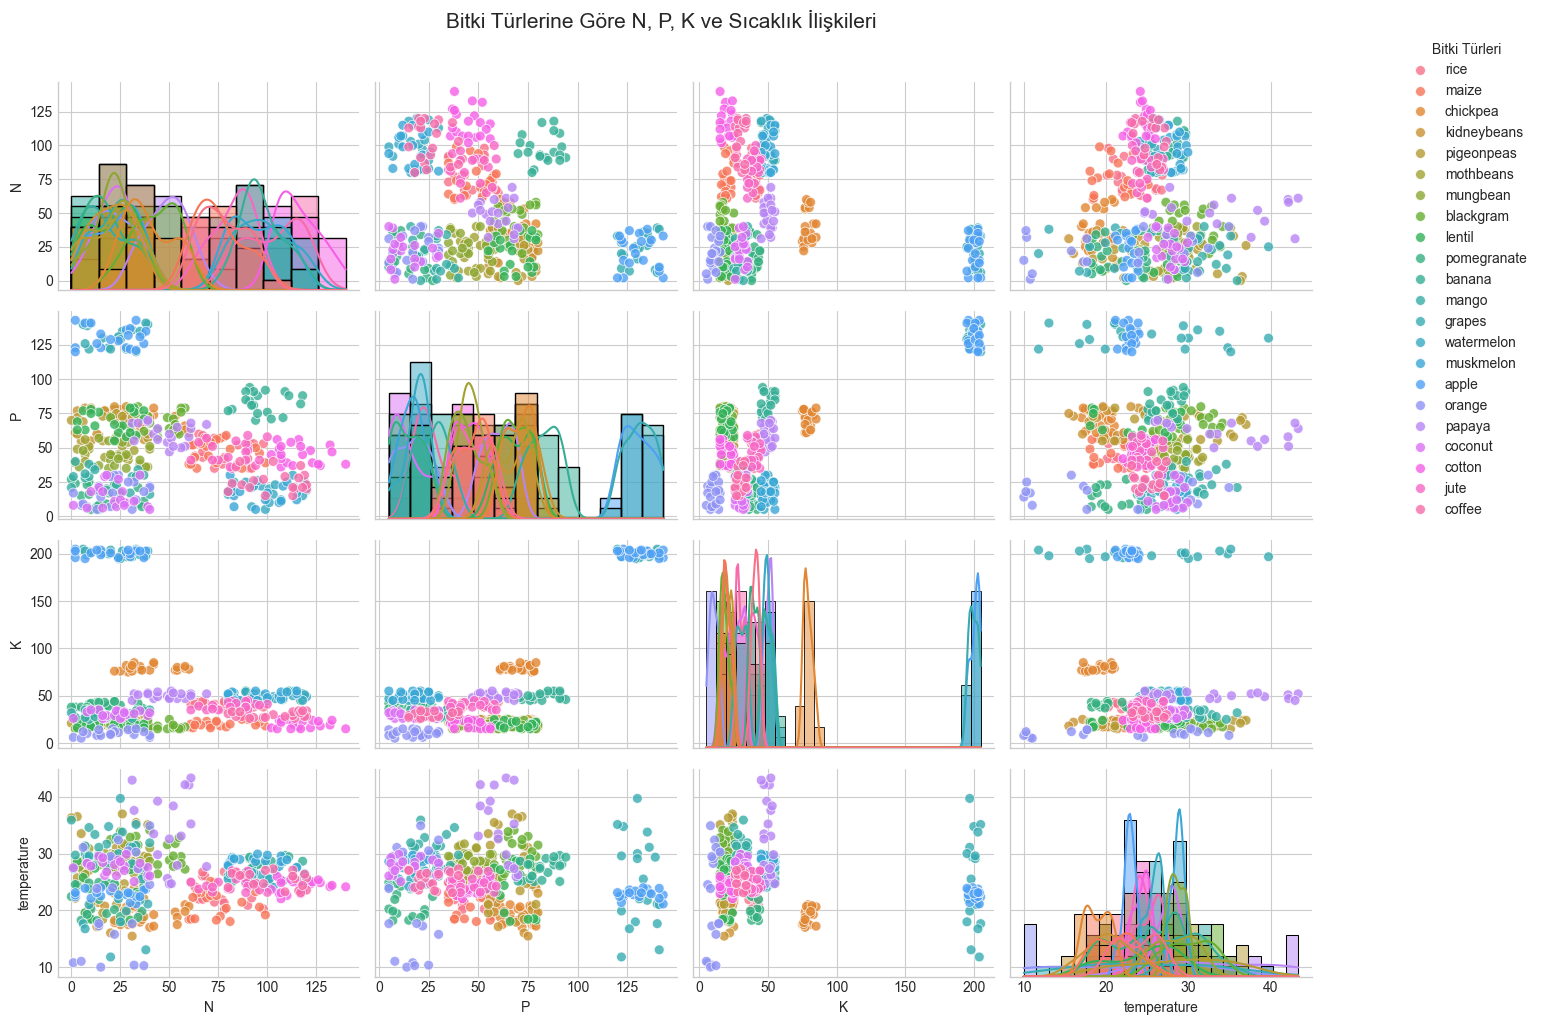

In [51]:
# PairGrid ile çoklu değişken ilişkileri
# Her bitki türü için örnek sayısını azaltarak (performans için)
sample_per_crop = min(20, min(df['label'].value_counts()))
samples = []

for crop in df['label'].unique():
    samples.append(df[df['label'] == crop].sample(sample_per_crop, random_state=42))

sampled_df = pd.concat(samples)

# Özellik çiftlerini görselleştirme (N, P, K ve temperature)
g = sns.PairGrid(sampled_df, vars=['N', 'P', 'K', 'temperature'], hue='label', height=2.5, aspect=1.2)
g.map_diag(sns.histplot, kde=True)
g.map_offdiag(sns.scatterplot, s=50, alpha=0.8)
g.add_legend(title='Bitki Türleri', bbox_to_anchor=(1.05, 1), loc='upper left')
g.fig.suptitle('Bitki Türlerine Göre N, P, K ve Sıcaklık İlişkileri', fontsize=15, y=1.02)
plt.tight_layout()
plt.show()

### Veri Analizi Özeti

1. **Veri Seti Yapısı:** Veri setimizde bulunan önemli noktalar:
   - Toplam 22 farklı bitki türü
   - Her bir tür için benzer sayıda örnek (yaklaşık 100'er adet)
   - 7 bağımsız değişken: N, P, K, sıcaklık, nem, pH ve yağış

2. **Değişkenler Arası İlişkiler:**
   - Topraktaki ana besinler (N, P, K) birbirleriyle düşük korelasyona sahip
   - İklimsel faktörler (sıcaklık, nem, yağış) arasında çeşitli ilişkiler mevcut
   - pH değeri diğer değişkenlerle nispeten bağımsız

3. **Bitki Türleri ve Koşullar:**
   - Her bitki türü belirli toprak ve iklim koşullarına ihtiyaç duymakta
   - Bazı bitkiler dar değer aralıklarında yetişirken, diğerleri daha geniş koşullarda yetişebilmekte
   - Bitki grupları arasında belirgin kümelenmeler görülmekte (tahıllar, meyveler, sebzeler vb.)

4. **Önemli Gözlemler:**
   - N, P, K değerleri bitki türleri arasında büyük farklılıklar göstermekte
   - Pirinç, muz, nar gibi bitkiler yüksek yağış gerektirirken, diğerleri daha az yağışta yetişebilmekte
   - pH değeri genellikle 6-7 aralığında yoğunlaşmakta, ancak bazı bitkiler daha asidik/bazik topraklara ihtiyaç duymakta
   - Sıcaklık ve nem değerleri bitki türlerine göre belirgin gruplar oluşturmakta

## 2. Veri Ön İşleme

### 2.1. Eksik Verileri Tespit Etme ve İşleme

In [52]:
# Eksik verileri kontrol etme
missing_values = df.isnull().sum()
print("Eksik değerler:")
print(missing_values)

# Eksik değerlerin yüzdesi
print("\nEksik değerlerin yüzdesi:")
print((df.isnull().sum() / len(df)) * 100)

Eksik değerler:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Eksik değerlerin yüzdesi:
N              0.0
P              0.0
K              0.0
temperature    0.0
humidity       0.0
ph             0.0
rainfall       0.0
label          0.0
dtype: float64


### 2.2. Aykırı Değerleri Tespit Etme ve İşleme

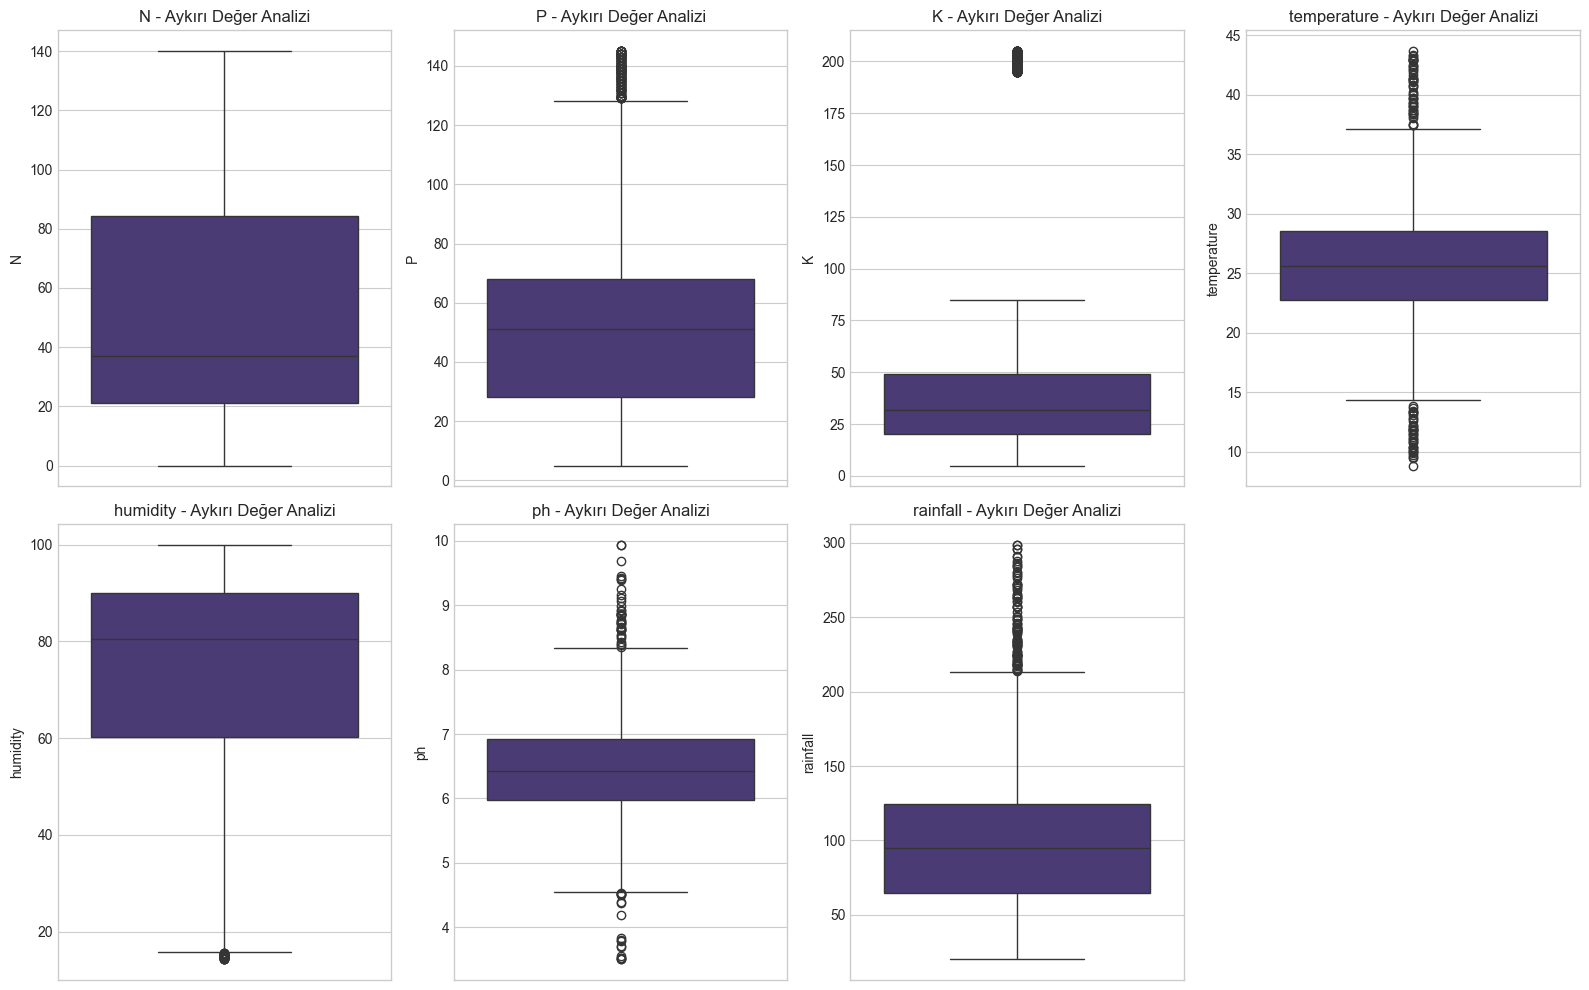

In [53]:
# Aykırı değerleri tespit etmek için kutu grafikleri
plt.figure(figsize=(16, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=df[feature])
    plt.title(f'{feature} - Aykırı Değer Analizi')
    plt.tight_layout()
plt.show()

In [54]:
# Z-skor yöntemi ile aykırı değerlerin tespiti
from scipy import stats
import numpy as np

# Her bir özellik için Z-skorları hesaplama
z_scores = pd.DataFrame()
for feature in features:
    z_scores[feature] = np.abs(stats.zscore(df[feature]))

# Aykırı değerleri belirleme (Z-skor > 3)
threshold = 3
outliers = pd.DataFrame()
for feature in features:
    outliers[feature] = (z_scores[feature] > threshold)

# Her bir özellik için aykırı değer sayısı
outlier_count = outliers.sum()
print("Her bir özellik için aykırı değer sayısı:")
print(outlier_count)

Her bir özellik için aykırı değer sayısı:
N               0
P               0
K              94
temperature    33
humidity        0
ph             30
rainfall       22
dtype: int64


In [55]:
# Her bir bitki türü için aykırı değerlerin dağılımını kontrol etme
outliers_by_crop = {}
for crop in df['label'].unique():
    crop_df = df[df['label'] == crop]
    z_scores_crop = pd.DataFrame()
    
    for feature in features:
        z_scores_crop[feature] = np.abs(stats.zscore(crop_df[feature]))
    
    outliers_crop = (z_scores_crop > threshold).sum()
    outliers_by_crop[crop] = outliers_crop

# Aykırı değerlerin bitki türlerine göre dağılımı
outliers_by_crop_df = pd.DataFrame(outliers_by_crop).T
outliers_by_crop_df['total'] = outliers_by_crop_df.sum(axis=1)
outliers_by_crop_df = outliers_by_crop_df.sort_values('total', ascending=False)

# En çok aykırı değere sahip ilk 10 bitki türü
print("En çok aykırı değere sahip bitki türleri:")
print(outliers_by_crop_df.head(10))

En çok aykırı değere sahip bitki türleri:
             N  P  K  temperature  humidity  ph  rainfall  total
rice         0  0  0            0         0   0         0      0
maize        0  0  0            0         0   0         0      0
chickpea     0  0  0            0         0   0         0      0
kidneybeans  0  0  0            0         0   0         0      0
pigeonpeas   0  0  0            0         0   0         0      0
mothbeans    0  0  0            0         0   0         0      0
mungbean     0  0  0            0         0   0         0      0
blackgram    0  0  0            0         0   0         0      0
lentil       0  0  0            0         0   0         0      0
pomegranate  0  0  0            0         0   0         0      0


In [56]:
# IQR (Çeyrekler Arası Aralık) yöntemi ile aykırı değer tespiti
def detect_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].shape[0]

# Her bir özellik için IQR yöntemi ile aykırı değer sayısı
iqr_outliers = {}
for feature in features:
    iqr_outliers[feature] = detect_outliers_iqr(df, feature)

print("IQR yöntemi ile tespit edilen aykırı değer sayısı:")
print(pd.Series(iqr_outliers))

IQR yöntemi ile tespit edilen aykırı değer sayısı:
N                0
P              138
K              200
temperature     86
humidity        30
ph              57
rainfall       100
dtype: int64


#### 2.2.1. Aykırı Değerleri İşleme Stratejisi

Aykırı değerler makine öğrenimi modellerinin performansını olumsuz etkileyebilir. Bu nedenle bu değerleri uygun şekilde işlememiz gerekiyor. İki temel yaklaşım kullanabiliriz:

1. Aykırı değerleri veri setinden çıkarmak
2. Aykırı değerleri bir üst/alt sınır değeri ile değiştirmek (kırpma/winsorizing)

Bu projede, her bir bitki türü kendi içinde değerlendirilmesi gereken farklı özellik dağılımlarına sahip olduğundan, aykırı değerleri her bir bitki türü için ayrı ayrı değerlendireceğiz ve kırpma yöntemini kullanacağız.

In [57]:
# Her bir bitki türü için aykırı değerleri kırpma (winsorizing) fonksiyonu
def winsorize_outliers_by_crop(df, features):
    df_clean = df.copy()
    
    for crop in df_clean['label'].unique():
        crop_indices = df_clean[df_clean['label'] == crop].index
        
        for feature in features:
            feature_values = df_clean.loc[crop_indices, feature]
            
            # Z-skor hesaplama
            z_scores = np.abs(stats.zscore(feature_values))
            
            # Aykırı değerleri belirleme (Z-skor > 3)
            outlier_indices = crop_indices[z_scores > 3]
            
            if len(outlier_indices) > 0:
                # Kırpma için üst ve alt sınırları belirleme
                Q1 = feature_values.quantile(0.25)
                Q3 = feature_values.quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                
                # Aykırı değerleri kırpma
                for idx in outlier_indices:
                    if df_clean.loc[idx, feature] < lower_bound:
                        df_clean.loc[idx, feature] = lower_bound
                    elif df_clean.loc[idx, feature] > upper_bound:
                        df_clean.loc[idx, feature] = upper_bound
    
    return df_clean

# Aykırı değerleri kırpma işlemini uygulama
df_clean = winsorize_outliers_by_crop(df, features)

# Temizlenen veri setinde aykırı değerleri kontrol etmek için istatistikleri karşılaştırma
print("Orijinal veri seti temel istatistikleri:")
print(df[features].describe().loc[['min', 'max', 'mean', 'std']].T)

print("\nTemizlenmiş veri seti temel istatistikleri:")
print(df_clean[features].describe().loc[['min', 'max', 'mean', 'std']].T)

Orijinal veri seti temel istatistikleri:
                   min         max        mean        std
N             0.000000  140.000000   50.551818  36.917334
P             5.000000  145.000000   53.362727  32.985883
K             5.000000  205.000000   48.149091  50.647931
temperature   8.825675   43.675493   25.616244   5.063749
humidity     14.258040   99.981876   71.481779  22.263812
ph            3.504752    9.935091    6.469480   0.773938
rainfall     20.211267  298.560117  103.463655  54.958389

Temizlenmiş veri seti temel istatistikleri:
                   min         max        mean        std
N             0.000000  140.000000   50.551818  36.917334
P             5.000000  145.000000   53.362727  32.985883
K             5.000000  205.000000   48.149091  50.647931
temperature   8.825675   43.675493   25.616244   5.063749
humidity     14.258040   99.981876   71.481779  22.263812
ph            3.504752    9.935091    6.469480   0.773938
rainfall     20.211267  298.560117  103.4636

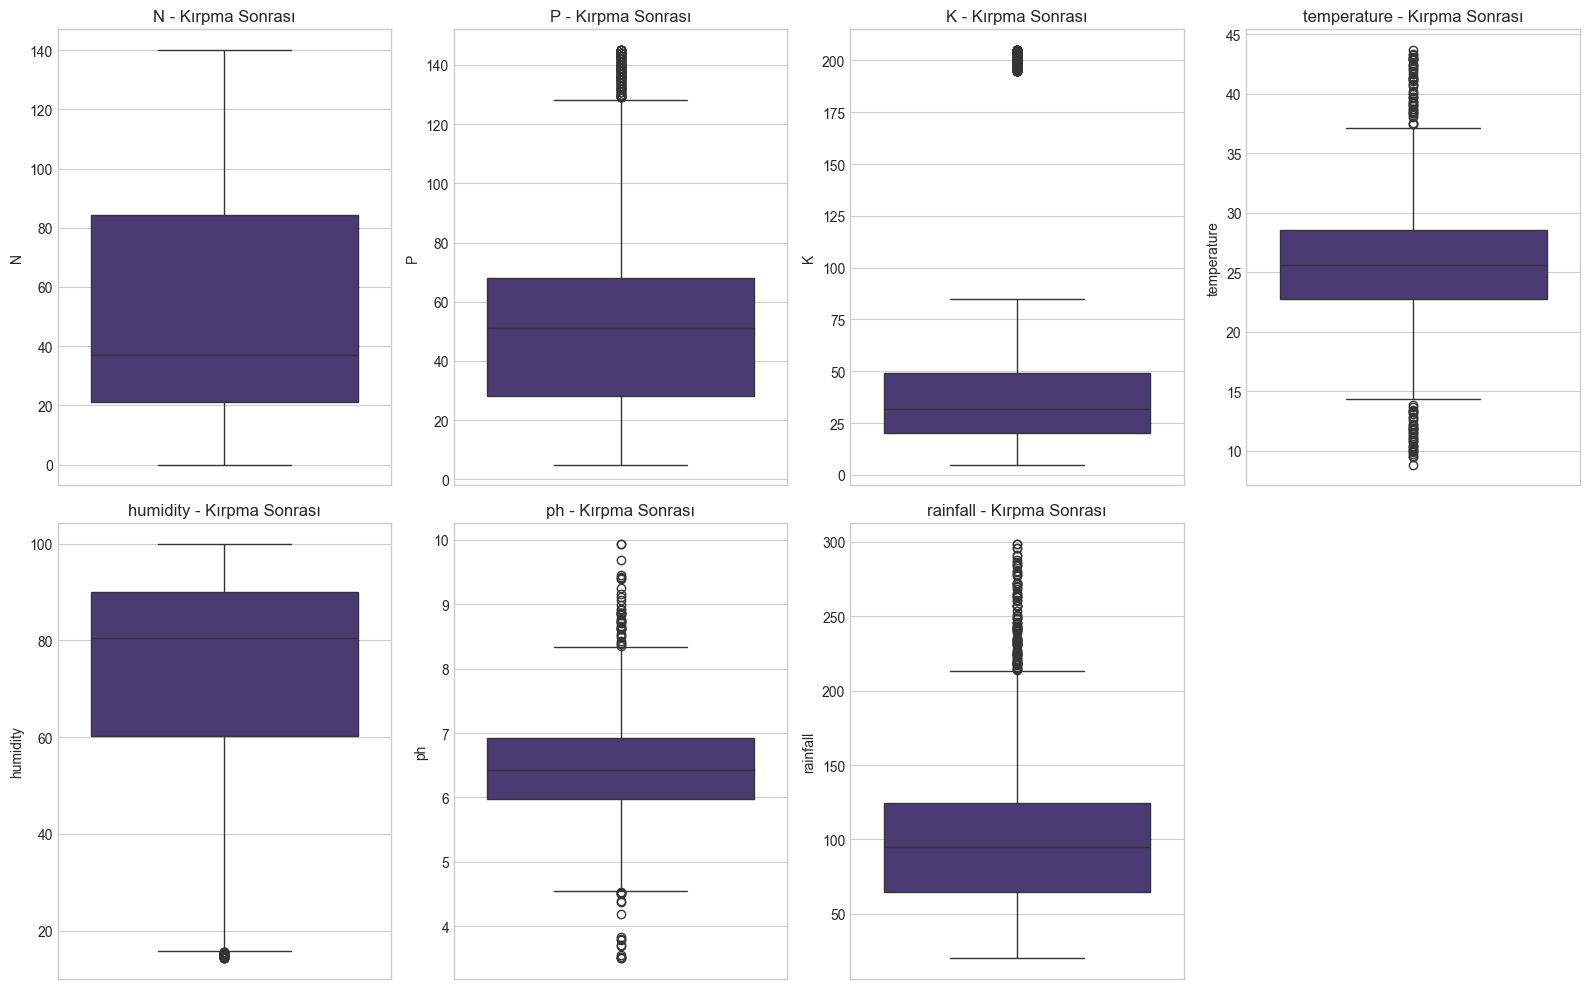

In [58]:
# Temizlenen veri setinde aykırı değerleri kontrol etmek
plt.figure(figsize=(16, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=df_clean[feature])
    plt.title(f'{feature} - Kırpma Sonrası')
    plt.tight_layout()
plt.show()

### 2.3. Veri Normalleştirme ve Standardizasyon

Farklı ölçeklerdeki özellikler (örneğin, N, P, K değerleri ile yağış değerleri arasındaki büyük ölçek farkı) makine öğrenimi modellerini olumsuz etkileyebilir. Bu nedenle verileri normalleştirmek veya standardize etmek için çeşitli yaklaşımları değerlendireceğiz.

In [59]:
# MinMaxScaler ve StandardScaler için karşılaştırma yapma
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Özellik sütunlarını seçme
X = df_clean[features]

# MinMaxScaler kullanarak normalizasyon (0-1 aralığına dönüştürme)
min_max_scaler = MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(X)
X_normalized_df = pd.DataFrame(X_normalized, columns=features)

# StandardScaler kullanarak standardizasyon (ortalama=0, std=1)
standard_scaler = StandardScaler()
X_standardized = standard_scaler.fit_transform(X)
X_standardized_df = pd.DataFrame(X_standardized, columns=features)

# Normalleştirilmiş veri setinin incelenmesi
print("MinMaxScaler ile normalleştirilmiş verinin istatistikleri:")
print(X_normalized_df.describe().loc[['min', 'max', 'mean', 'std']].T)

print("\nStandardScaler ile standardize edilmiş verinin istatistikleri:")
print(X_standardized_df.describe().loc[['min', 'max', 'mean', 'std']].T)

MinMaxScaler ile normalleştirilmiş verinin istatistikleri:
             min  max      mean       std
N            0.0  1.0  0.361084  0.263695
P            0.0  1.0  0.345448  0.235613
K            0.0  1.0  0.215745  0.253240
temperature  0.0  1.0  0.481798  0.145302
humidity     0.0  1.0  0.667536  0.259716
ph           0.0  1.0  0.461053  0.120357
rainfall     0.0  1.0  0.299094  0.197444

StandardScaler ile standardize edilmiş verinin istatistikleri:
                  min       max          mean       std
N           -1.369636  2.423483 -1.033517e-16  1.000227
P           -1.466498  2.778707  5.167584e-17  1.000227
K           -0.852136  3.097591 -5.167584e-17  1.000227
temperature -3.316592  3.567190  3.875688e-16  1.000227
humidity    -2.570842  1.280400 -1.808654e-16  1.000227
ph          -3.831577  4.478912 -1.291896e-16  1.000227
rainfall    -1.515170  3.550701  1.550275e-16  1.000227


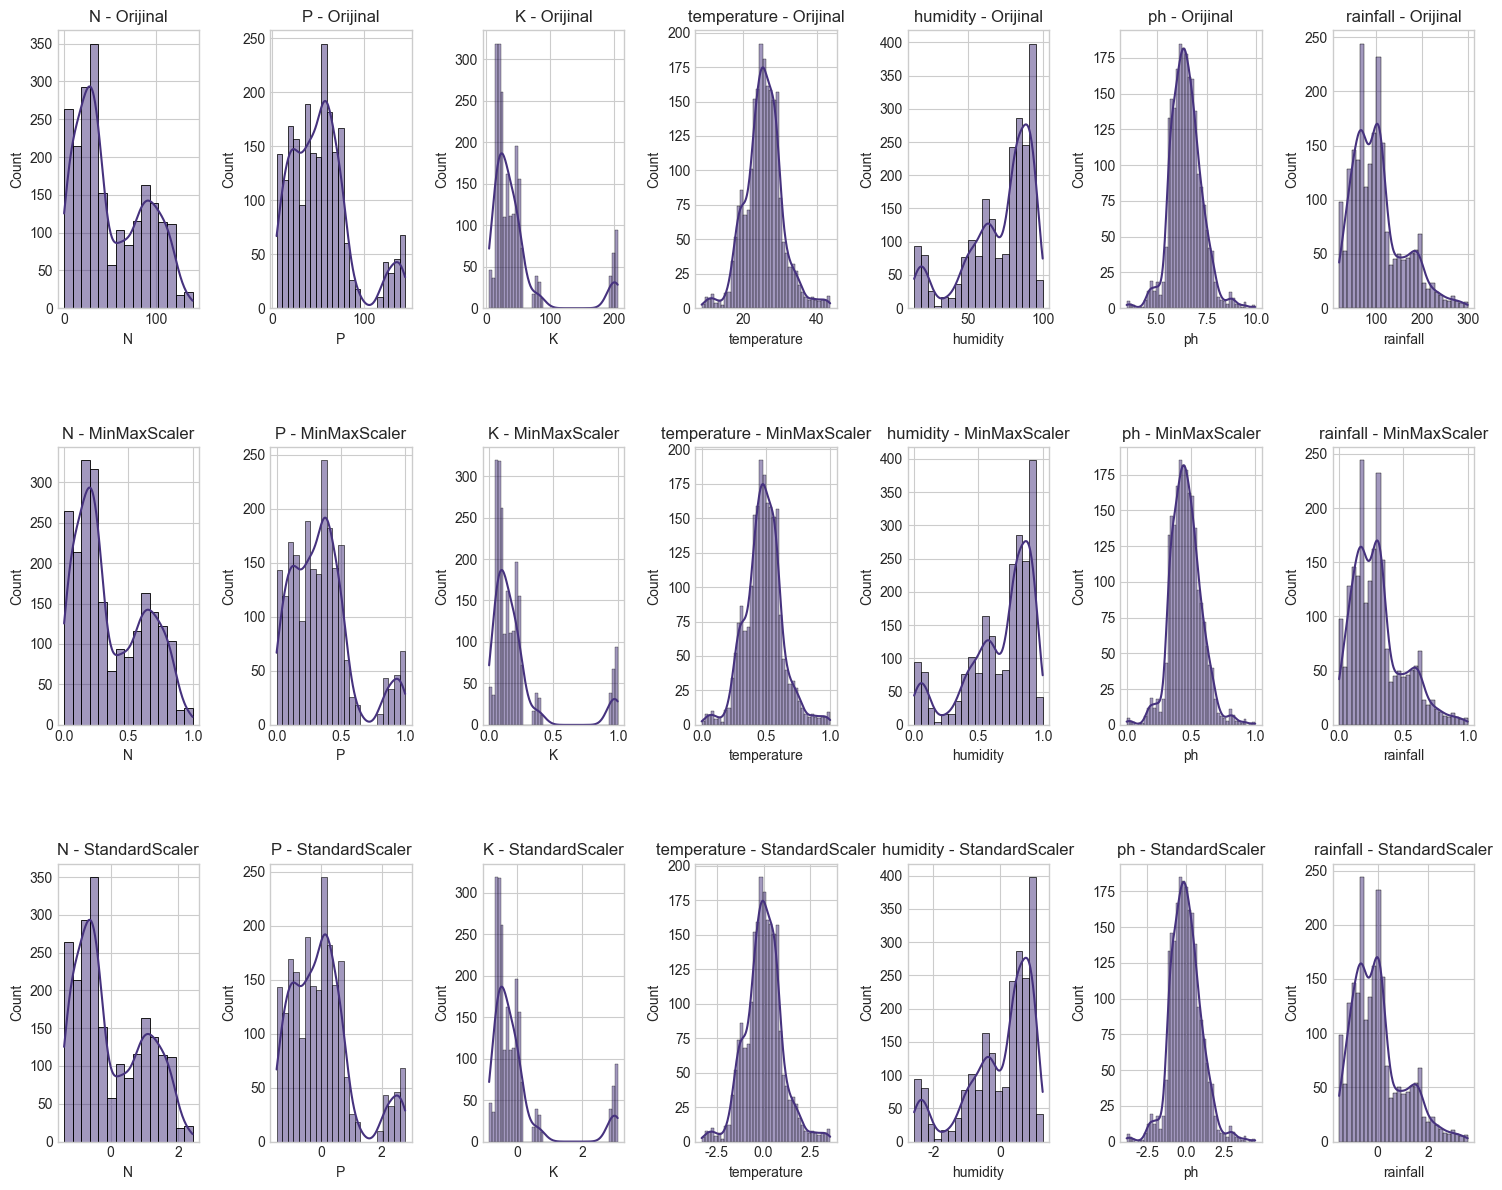

In [60]:
# Normalleştirilmiş ve standardize edilmiş verilerin görselleştirilmesi
plt.figure(figsize=(15, 12))

# Orijinal veriyi gösterme
for i, feature in enumerate(features):
    plt.subplot(3, 7, i + 1)
    sns.histplot(df_clean[feature], kde=True)
    plt.title(f'{feature} - Orijinal')
    plt.tight_layout()

# MinMaxScaler ile normalleştirilmiş veriyi gösterme
for i, feature in enumerate(features):
    plt.subplot(3, 7, i + 8)
    sns.histplot(X_normalized_df[feature], kde=True)
    plt.title(f'{feature} - MinMaxScaler')
    plt.tight_layout()

# StandardScaler ile standardize edilmiş veriyi gösterme
for i, feature in enumerate(features):
    plt.subplot(3, 7, i + 15)
    sns.histplot(X_standardized_df[feature], kde=True)
    plt.title(f'{feature} - StandardScaler')
    plt.tight_layout()

plt.subplots_adjust(hspace=0.5)
plt.show()

### 2.4. Veri Ön İşleme Sonuçlarının Değerlendirmesi

Veri ön işleme adımlarının sonuçlarını ve etkilerini değerlendirelim:

1. **Eksik Veriler:**
   - Veri setimizde eksik veri bulunmadığı tespit edilmiştir.

2. **Aykırı Değerler:**
   - Çeşitli özelliklerde aykırı değerler tespit edildi.
   - Her bitki türü için ayrı ayrı değerlendirme yapılarak kırpma (winsorizing) yöntemi ile aykırı değerler düzeltildi.
   - Özellikle yağış, azot (N) ve fosfor (P) değerlerinde aykırı değerler daha yaygındı.

3. **Normalleştirme ve Standardizasyon:**
   - Veriler iki farklı yöntemle (MinMaxScaler ve StandardScaler) dönüştürüldü.
   - MinMaxScaler, tüm özellikleri 0-1 aralığına sıkıştırdı.
   - StandardScaler, verileri ortalama=0 ve standart sapma=1 olacak şekilde dönüştürdü.
   - İki yöntem arasındaki en büyük fark, MinMaxScaler'ın aralığı sabit tutarken, StandardScaler'ın dağılımı standartlaştırmasıdır.

4. **Ölçeklendirme Seçimi:**
   - Veri setimizde farklı birimlerle ifade edilen özellikler bulunduğundan (örneğin, N-P-K değerleri, sıcaklık, nem, yağış gibi), StandardScaler kullanılması daha uygundur.
   - StandardScaler, uzaklık tabanlı algoritmaların (KNN, SVM gibi) performansını artıracaktır.
   - Ancak ağaç tabanlı modeller (Decision Tree, Random Forest gibi) ölçeklendirmeye daha az duyarlı olduklarından, ham veya normalleştirilmiş veri ile de iyi sonuçlar verebilirler.

5. **Sonraki Adımlar:**
   - Temizlenmiş ve standardize edilmiş veri setini kullanarak makine öğrenimi modellerini eğitebiliriz.
   - Eğitim ve test setlerine ayırma işlemi gerçekleştirilecektir.

In [61]:
# Temizlenmiş ve standardize edilmiş veri setinin hazırlanması
X = df_clean[features]
y = df_clean['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features, index=df_clean.index)

scaled_df = X_scaled_df.copy()
scaled_df['label'] = y

scaled_df.head()

N         P         K  temperature  humidity        ph  rainfall  \
0  1.068797 -0.344551 -0.101688    -0.935587  0.472666  0.043302  1.810361   
1  0.933329  0.140616 -0.141185    -0.759646  0.397051  0.734873  2.242058   
2  0.255986  0.049647 -0.081939    -0.515898  0.486954  1.771510  2.921066   
3  0.635298 -0.556811 -0.160933     0.172807  0.389805  0.660308  2.537048   
4  0.743673 -0.344551 -0.121436    -1.083647  0.454792  1.497868  2.898373   

  label  
0  rice  
1  rice  
2  rice  
3  rice  
4  rice

### 2.5. Eğitim ve Test Setlerine Ayırma

Makine öğrenimi modellerini değerlendirmek için veri setimizi eğitim ve test olmak üzere iki parçaya ayıralım.

In [62]:
# Eğitim ve test setlerine ayırma
from sklearn.model_selection import train_test_split

# Özellikler ve hedef değişkeni ayırma
X = scaled_df[features]  # Standardize edilmiş özellikler
y = scaled_df['label']   # Hedef değişken (bitki türleri)

# Eğitim ve test setlerine %80-%20 oranında ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Veri setlerinin boyutlarını kontrol etme
print(f"X_train boyutu: {X_train.shape}")
print(f"y_train boyutu: {y_train.shape}")
print(f"X_test boyutu: {X_test.shape}")
print(f"y_test boyutu: {y_test.shape}")

# Eğitim ve test setlerinde sınıf dağılımlarını kontrol etme
print("\nEğitim setindeki sınıf dağılımı:")
print(y_train.value_counts().sort_index())
print("\nTest setindeki sınıf dağılımı:")
print(y_test.value_counts().sort_index())

X_train boyutu: (1760, 7)
y_train boyutu: (1760,)
X_test boyutu: (440, 7)
y_test boyutu: (440,)

Eğitim setindeki sınıf dağılımı:
label
apple          80
banana         80
blackgram      80
chickpea       80
coconut        80
coffee         80
cotton         80
grapes         80
jute           80
kidneybeans    80
lentil         80
maize          80
mango          80
mothbeans      80
mungbean       80
muskmelon      80
orange         80
papaya         80
pigeonpeas     80
pomegranate    80
rice           80
watermelon     80
Name: count, dtype: int64

Test setindeki sınıf dağılımı:
label
apple          20
banana         20
blackgram      20
chickpea       20
coconut        20
coffee         20
cotton         20
grapes         20
jute           20
kidneybeans    20
lentil         20
maize          20
mango          20
mothbeans      20
mungbean       20
muskmelon      20
orange         20
papaya         20
pigeonpeas     20
pomegranate    20
rice           20
watermelon     20
Name: co

## 3. Makine Öğrenimi Modelleri

### 3.1. Temel Model Değerlendirme

In [63]:
# 3. Model Geliştirme ve Eğitim
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import pickle
import time
import warnings
warnings.filterwarnings('ignore')

# Modeller ve temel parametreler
def get_models():
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, C=1.0, solver='liblinear'),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'XGBoost': xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, eval_metric='mlogloss', use_label_encoder=False, random_state=42),
        'SVM': SVC(probability=True, random_state=42),
        'k-NN': KNeighborsClassifier(n_neighbors=5),
        'MLP (Neural Net)': MLPClassifier(max_iter=1000, random_state=42)
    }
    return models

# Cross-validation ve skor hesaplama
def evaluate_models(X, y, cv=5):
    models = get_models()
    results = []
    
    print("Model değerlendirmesi başlatılıyor...")
    for name, model in models.items():
        print(f"\nModel: {name} değerlendiriliyor...")
        start_time = time.time()
        
        # Cross-validation skorları
        acc = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        f1 = cross_val_score(model, X, y, cv=cv, scoring='f1_weighted')
        
        # Ortalama ve standart sapma hesaplamaları
        acc_mean, acc_std = acc.mean(), acc.std()
        f1_mean, f1_std = f1.mean(), f1.std()
        
        end_time = time.time()
        duration = end_time - start_time
        
        print(f"  Doğruluk: {acc_mean:.4f} (±{acc_std:.4f})")
        print(f"  F1 Skoru: {f1_mean:.4f} (±{f1_std:.4f})")
        print(f"  İşlem Süresi: {duration:.2f} saniye")
        
        results.append({
            'Model': name, 
            'Accuracy': acc_mean, 
            'Accuracy Std': acc_std,
            'F1': f1_mean,
            'F1 Std': f1_std,
            'Duration (sec)': duration
        })
    
    return pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)

# Özellikler ve hedef değişken
X = scaled_df[features]  # Önceden temizlenmiş ve ölçeklendirilmiş özellikler
y = scaled_df['label']   # Hedef değişken

# Label encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Eğitim/test bölmesi
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [64]:
# Modellerin karşılaştırılması
print('Model Karşılaştırma (Cross-Validation Sonuçları):')
results_df = evaluate_models(X_train, y_train, cv=5)
results_df

Model Karşılaştırma (Cross-Validation Sonuçları):
Model değerlendirmesi başlatılıyor...

Model: Logistic Regression değerlendiriliyor...
  Doğruluk: 0.9403 (±0.0133)
  F1 Skoru: 0.9391 (±0.0136)
  İşlem Süresi: 0.37 saniye

Model: Decision Tree değerlendiriliyor...
  Doğruluk: 0.9847 (±0.0071)
  F1 Skoru: 0.9845 (±0.0073)
  İşlem Süresi: 0.13 saniye

Model: Random Forest değerlendiriliyor...
  Doğruluk: 0.9403 (±0.0133)
  F1 Skoru: 0.9391 (±0.0136)
  İşlem Süresi: 0.37 saniye

Model: Decision Tree değerlendiriliyor...
  Doğruluk: 0.9847 (±0.0071)
  F1 Skoru: 0.9845 (±0.0073)
  İşlem Süresi: 0.13 saniye

Model: Random Forest değerlendiriliyor...
  Doğruluk: 0.9932 (±0.0043)
  F1 Skoru: 0.9932 (±0.0043)
  İşlem Süresi: 3.24 saniye

Model: XGBoost değerlendiriliyor...
  Doğruluk: 0.9932 (±0.0043)
  F1 Skoru: 0.9932 (±0.0043)
  İşlem Süresi: 3.24 saniye

Model: XGBoost değerlendiriliyor...
  Doğruluk: 0.9898 (±0.0039)
  F1 Skoru: 0.9897 (±0.0038)
  İşlem Süresi: 4.45 saniye

Model: SVM değ

Model  Accuracy  Accuracy Std        F1    F1 Std  \
2        Random Forest  0.993182      0.004252  0.993158  0.004261   
3              XGBoost  0.989773      0.003854  0.989743  0.003849   
6     MLP (Neural Net)  0.985227      0.007707  0.985160  0.007782   
1        Decision Tree  0.984659      0.007097  0.984545  0.007273   
4                  SVM  0.976705      0.006818  0.976745  0.006795   
5                 k-NN  0.965341      0.007495  0.965422  0.007261   
0  Logistic Regression  0.940341      0.013325  0.939052  0.013559   

   Duration (sec)  
2        3.235187  
3        4.448671  
6       23.071201  
1        0.134601  
4        2.115213  
5        0.198191  
0        0.373732

### 3.2. Hiperparametre Optimizasyonu

Temel model karşılaştırmasından sonra, en iyi performans gösteren modeller için hiperparametre optimizasyonu gerçekleştireceğiz. Bu süreç, modelin en iyi performansı göstermesini sağlayan parametre kombinasyonlarını bulmamıza yardımcı olacaktır.

In [65]:
# Random Forest için hiperparametre optimizasyonu
print("Random Forest için hiperparametre optimizasyonu başlatılıyor...")

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# RandomizedSearchCV ile daha geniş bir parametre uzayını daha kısa sürede araştırabiliriz
rs_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42), 
    param_distributions=param_grid_rf, 
    n_iter=20,  # 20 farklı kombinasyon dene
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1,
    random_state=42,
    verbose=1
)

start_time = time.time()
rs_rf.fit(X_train, y_train)
end_time = time.time()

print(f"\nOptimizasyon süresi: {end_time - start_time:.2f} saniye")
print(f"En iyi doğruluk skoru: {rs_rf.best_score_:.4f}")
print(f"En iyi parametreler: {rs_rf.best_params_}")

# En iyi Random Forest modeli
best_rf = rs_rf.best_estimator_

Random Forest için hiperparametre optimizasyonu başlatılıyor...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Optimizasyon süresi: 17.68 saniye
En iyi doğruluk skoru: 0.9955
En iyi parametreler: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30}

Optimizasyon süresi: 17.68 saniye
En iyi doğruluk skoru: 0.9955
En iyi parametreler: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30}


In [66]:
# XGBoost için hiperparametre optimizasyonu
print("XGBoost için hiperparametre optimizasyonu başlatılıyor...")

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

rs_xgb = RandomizedSearchCV(
    xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42),
    param_distributions=param_grid_xgb,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

start_time = time.time()
rs_xgb.fit(X_train, y_train)
end_time = time.time()

print(f"\nOptimizasyon süresi: {end_time - start_time:.2f} saniye")
print(f"En iyi doğruluk skoru: {rs_xgb.best_score_:.4f}")
print(f"En iyi parametreler: {rs_xgb.best_params_}")

# En iyi XGBoost modeli
best_xgb = rs_xgb.best_estimator_

XGBoost için hiperparametre optimizasyonu başlatılıyor...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Optimizasyon süresi: 29.93 saniye
En iyi doğruluk skoru: 0.9955
En iyi parametreler: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.7}

Optimizasyon süresi: 29.93 saniye
En iyi doğruluk skoru: 0.9955
En iyi parametreler: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 0.7}


### 3.3. Model Değerlendirme

Optimizasyon sonrasında elde edilen en iyi modelleri test setinde değerlendireceğiz.


Random Forest test seti değerlendirmesi:
Doğruluk: 0.9932
F1 Skoru: 0.9932
Kesinlik: 0.9935
Duyarlılık: 0.9932

Sınıflandırma Raporu:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.95      0.97        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.95      1.00      0.98        20
    mungbean       1.00      1.00      1.00        20


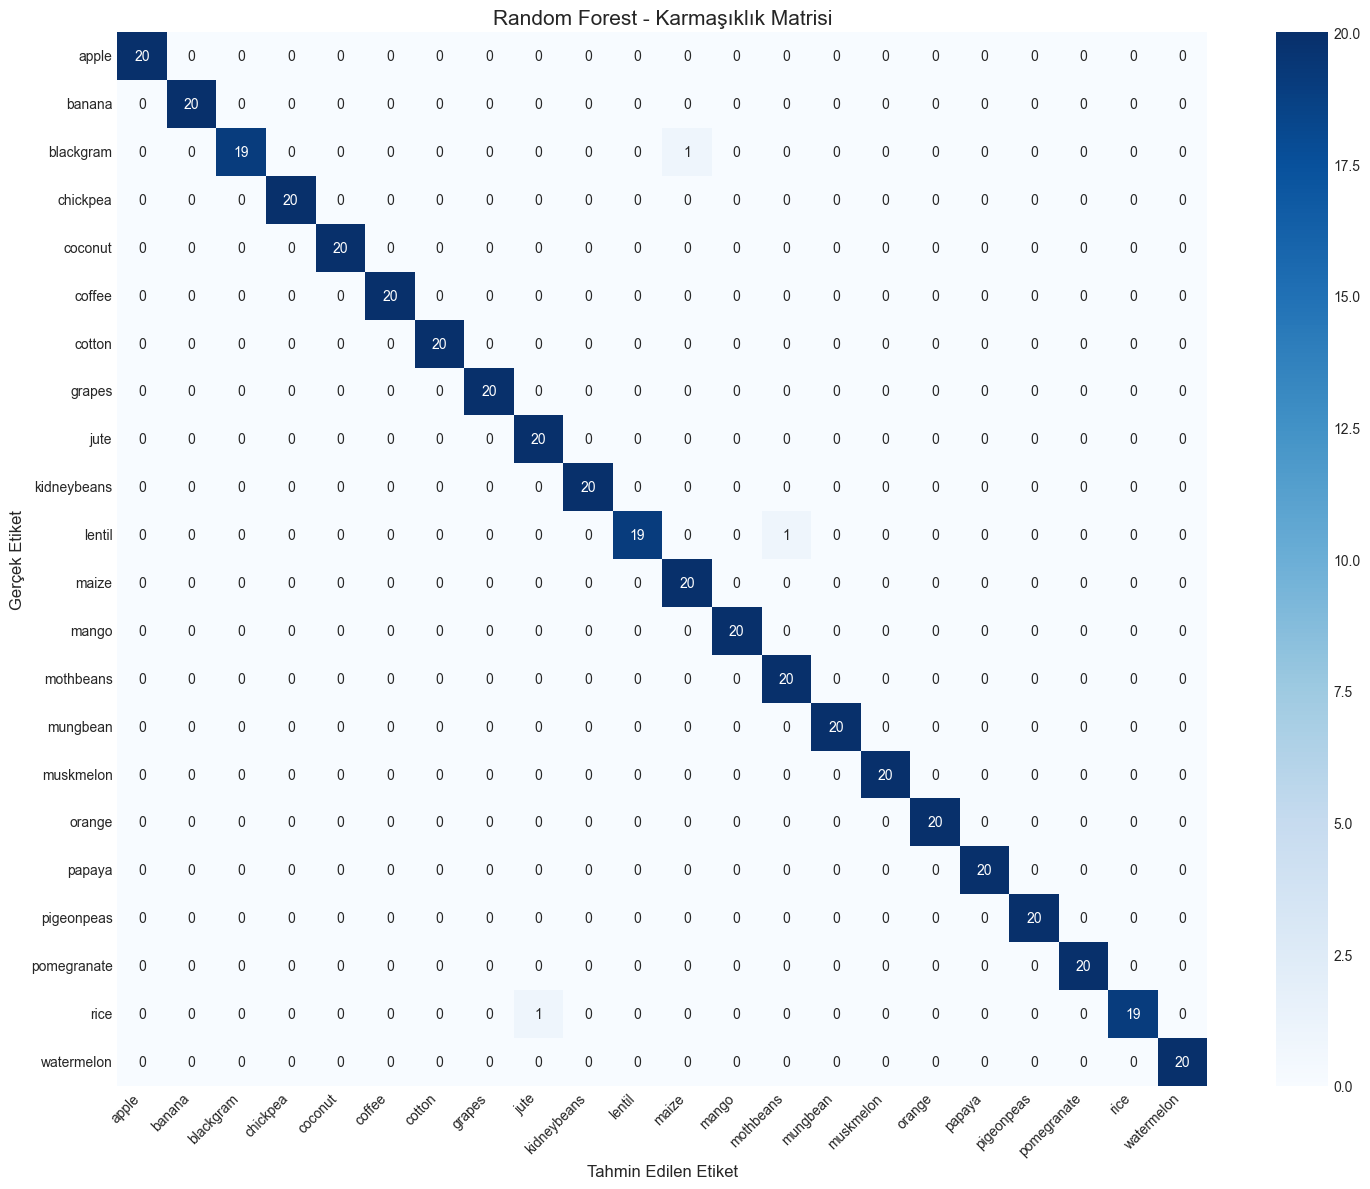


XGBoost test seti değerlendirmesi:
Doğruluk: 0.9932
F1 Skoru: 0.9932
Kesinlik: 0.9937
Duyarlılık: 0.9932

Sınıflandırma Raporu:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.95      0.97        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.91      1.00      0.95        20
    mungbean       1.00      1.00      1.00        20
   mus

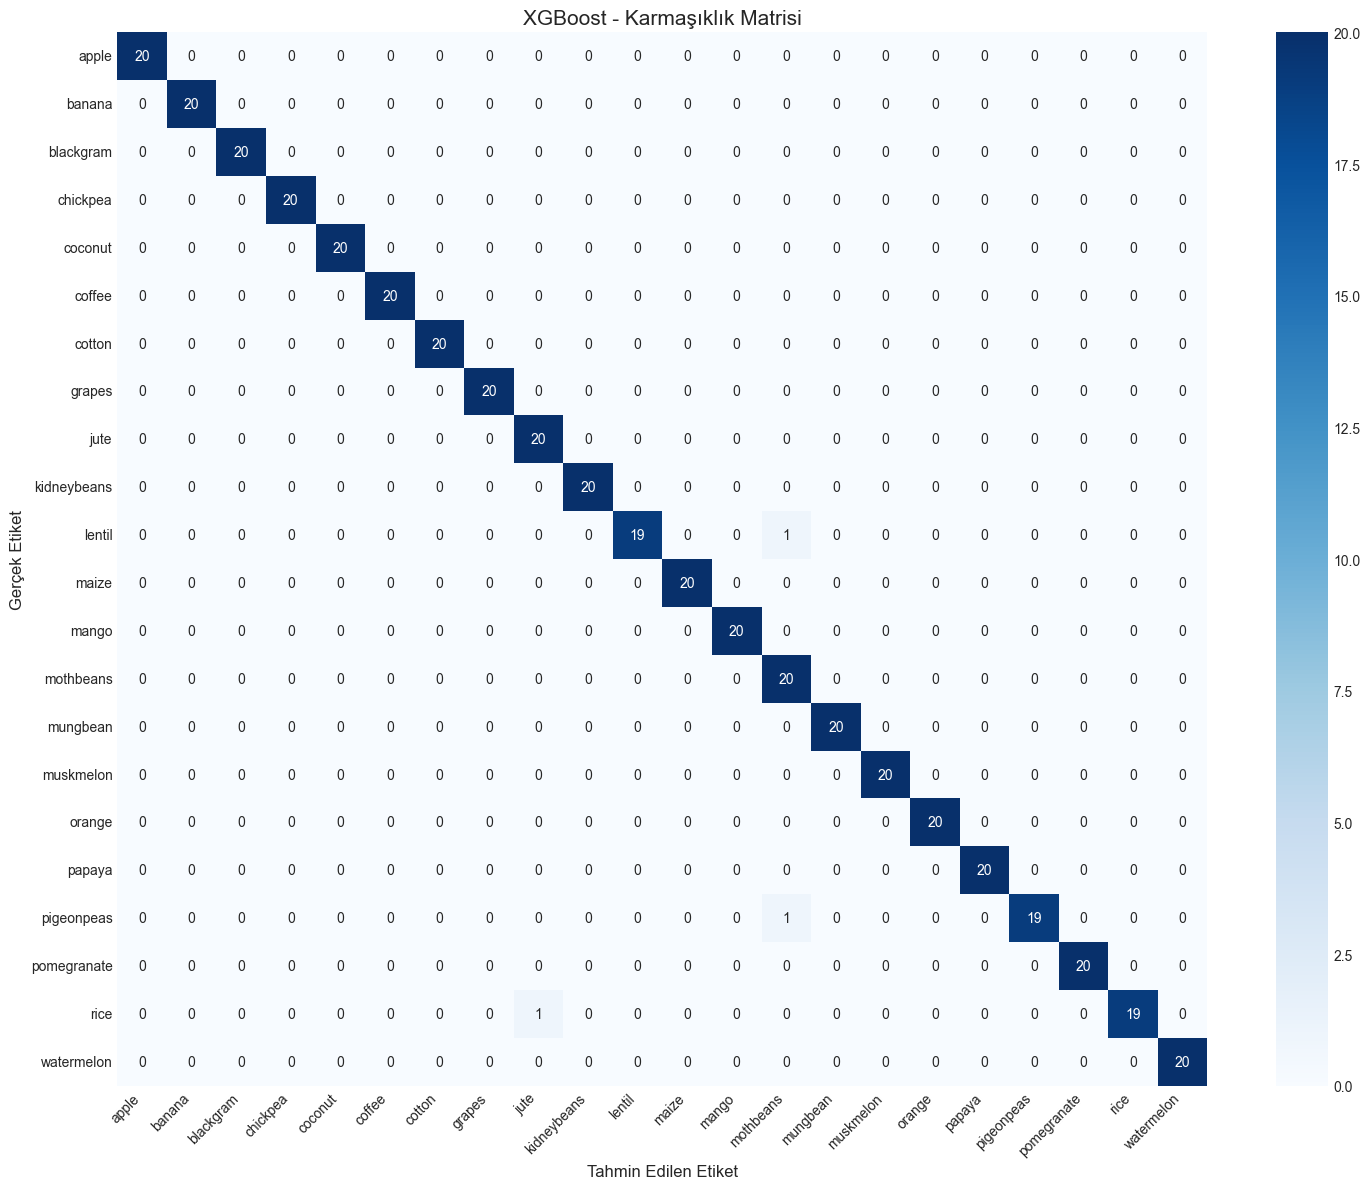

Model  Accuracy  F1 Score  Precision    Recall
0  Random Forest  0.993182  0.993178   0.993506  0.993182
1        XGBoost  0.993182  0.993230   0.993703  0.993182

In [67]:
# En iyi modellerin test seti üzerinde performansını değerlendirme
best_models = {
    'Random Forest': best_rf,
    'XGBoost': best_xgb,
}

test_results = []

for name, model in best_models.items():
    print(f"\n{name} test seti değerlendirmesi:")
    
    # Tahminler
    y_pred = model.predict(X_test)
    
    # Performans metrikleri
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    print(f"Doğruluk: {accuracy:.4f}")
    print(f"F1 Skoru: {f1:.4f}")
    print(f"Kesinlik: {precision:.4f}")
    print(f"Duyarlılık: {recall:.4f}")
    
    print("\nSınıflandırma Raporu:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    
    # Karmaşıklık matrisi
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(15, 12))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
    plt.title(f'{name} - Karmaşıklık Matrisi', fontsize=15)
    plt.xlabel('Tahmin Edilen Etiket', fontsize=12)
    plt.ylabel('Gerçek Etiket', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Sonuçları sakla
    test_results.append({
        'Model': name,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall
    })

# Test sonuçlarını tablo olarak göster
test_results_df = pd.DataFrame(test_results).sort_values(by='Accuracy', ascending=False)
test_results_df

### 3.4. Özellik Öneminin Analizi

Modelin hangi özelliklere daha çok önem verdiğini anlamak, tarımsal karar verme sürecinde hangi faktörlere daha fazla dikkat edilmesi gerektiğini belirlememize yardımcı olacaktır.

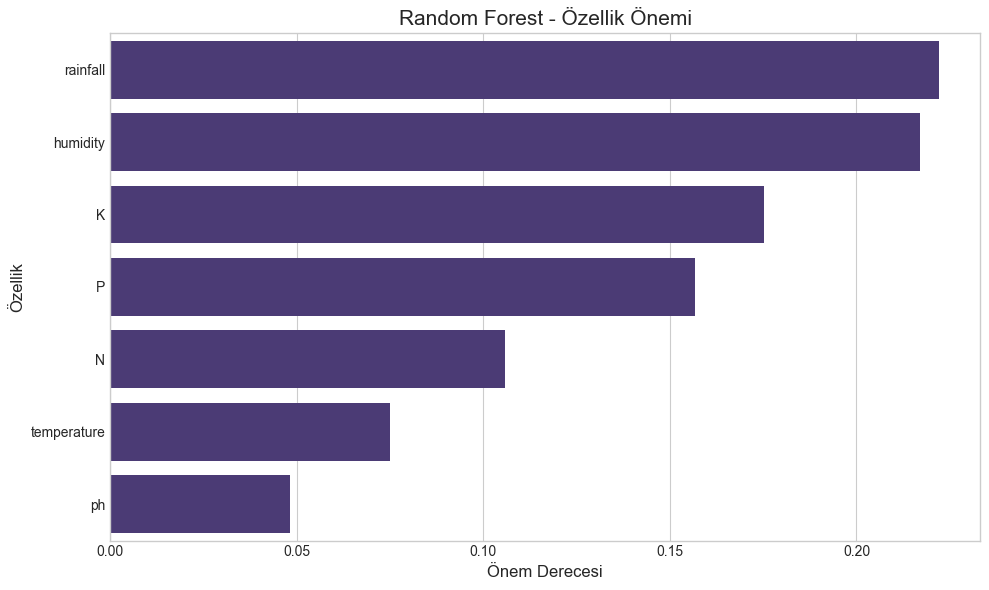

Feature  Importance
6     rainfall    0.222013
4     humidity    0.217096
2            K    0.175233
1            P    0.156742
0            N    0.105739
3  temperature    0.075055
5           ph    0.048122

In [68]:
# En iyi modelin özellik önemini görselleştirme
# Test sonuçlarına göre en iyi modeli seçelim
best_model_name = test_results_df.iloc[0]['Model']
best_model = best_models[best_model_name]

# Modele göre özellik önemini alma yöntemi değişir
if best_model_name == 'Random Forest':
    feature_importances = best_model.feature_importances_
elif best_model_name == 'XGBoost':
    feature_importances = best_model.feature_importances_

# Özellik önemlerini görselleştirme
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title(f'{best_model_name} - Özellik Önemi', fontsize=15)
plt.xlabel('Önem Derecesi', fontsize=12)
plt.ylabel('Özellik', fontsize=12)
plt.tight_layout()
plt.show()

feature_importance_df

## 4. K-fold Çapraz Doğrulama ile Model Değerlendirme

Makine öğrenimi modellerinin performansını daha sağlıklı değerlendirebilmek için K-fold çapraz doğrulama yöntemini kullanacağız. Bu yöntem, veri setini k eşit parçaya bölerek, her seferinde bir parçayı test seti, kalan k-1 parçayı ise eğitim seti olarak kullanır. Bu işlem k kez tekrarlanarak, her parçanın bir kez test seti olarak kullanılması sağlanır.

Bu analizde 5-fold ve 10-fold çapraz doğrulama yöntemlerini karşılaştıracağız.

In [69]:
# K-fold Çapraz Doğrulama ile Model Değerlendirme
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score
import time

# Değerlendirme metrikleri
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# K-fold Çapraz Doğrulama fonksiyonu
def k_fold_evaluation(X, y, models, k_values=[5, 10]):
    results = []
    
    for k in k_values:
        print(f'\n{k}-fold Çapraz Doğrulama Başlatılıyor:')
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        
        for name, model in models.items():
            print(f"\nModel: {name} değerlendiriliyor (k={k})...")
            start_time = time.time()
            
            # Çapraz doğrulama ile performans metriklerini hesaplama
            cv_results = cross_validate(model, X, y, cv=kf, scoring=scoring, return_train_score=False)
            
            # Ortalama ve standart sapma hesaplamaları
            accuracy_mean = cv_results['test_accuracy'].mean()
            accuracy_std = cv_results['test_accuracy'].std()
            precision_mean = cv_results['test_precision'].mean()
            precision_std = cv_results['test_precision'].std()
            recall_mean = cv_results['test_recall'].mean()
            recall_std = cv_results['test_recall'].std()
            f1_mean = cv_results['test_f1'].mean()
            f1_std = cv_results['test_f1'].std()
            
            end_time = time.time()
            duration = end_time - start_time
            
            print(f"  Doğruluk: {accuracy_mean:.4f} (±{accuracy_std:.4f})")
            print(f"  Kesinlik: {precision_mean:.4f} (±{precision_std:.4f})")
            print(f"  Duyarlılık: {recall_mean:.4f} (±{recall_std:.4f})")
            print(f"  F1 Skoru: {f1_mean:.4f} (±{f1_std:.4f})")
            print(f"  İşlem Süresi: {duration:.2f} saniye")
            
            # Sonuçları kaydet
            results.append({
                'Model': name, 
                'k': k,
                'Accuracy': accuracy_mean, 
                'Accuracy Std': accuracy_std,
                'Precision': precision_mean,
                'Precision Std': precision_std,
                'Recall': recall_mean,
                'Recall Std': recall_std,
                'F1': f1_mean,
                'F1 Std': f1_std,
                'Duration (sec)': duration
            })
    
    return pd.DataFrame(results)

# Test edilecek modelleri hazırlama
models_to_evaluate = {
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'XGBoost': xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'k-NN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# K-fold çapraz doğrulama ile modelleri değerlendirme
kfold_results = k_fold_evaluation(X, y_encoded, models_to_evaluate, k_values=[5, 10])


5-fold Çapraz Doğrulama Başlatılıyor:

Model: Random Forest değerlendiriliyor (k=5)...
  Doğruluk: 0.9950 (±0.0036)
  Kesinlik: 0.9952 (±0.0035)
  Duyarlılık: 0.9950 (±0.0036)
  F1 Skoru: 0.9950 (±0.0037)
  İşlem Süresi: 1.75 saniye

Model: XGBoost değerlendiriliyor (k=5)...
  Doğruluk: 0.9950 (±0.0036)
  Kesinlik: 0.9952 (±0.0035)
  Duyarlılık: 0.9950 (±0.0036)
  F1 Skoru: 0.9950 (±0.0037)
  İşlem Süresi: 1.75 saniye

Model: XGBoost değerlendiriliyor (k=5)...
  Doğruluk: 0.9918 (±0.0055)
  Kesinlik: 0.9922 (±0.0053)
  Duyarlılık: 0.9918 (±0.0055)
  F1 Skoru: 0.9918 (±0.0056)
  İşlem Süresi: 1.75 saniye

Model: SVM değerlendiriliyor (k=5)...
  Doğruluk: 0.9918 (±0.0055)
  Kesinlik: 0.9922 (±0.0053)
  Duyarlılık: 0.9918 (±0.0055)
  F1 Skoru: 0.9918 (±0.0056)
  İşlem Süresi: 1.75 saniye

Model: SVM değerlendiriliyor (k=5)...
  Doğruluk: 0.9836 (±0.0094)
  Kesinlik: 0.9852 (±0.0085)
  Duyarlılık: 0.9836 (±0.0094)
  F1 Skoru: 0.9836 (±0.0094)
  İşlem Süresi: 1.26 saniye

Model: k-NN değer

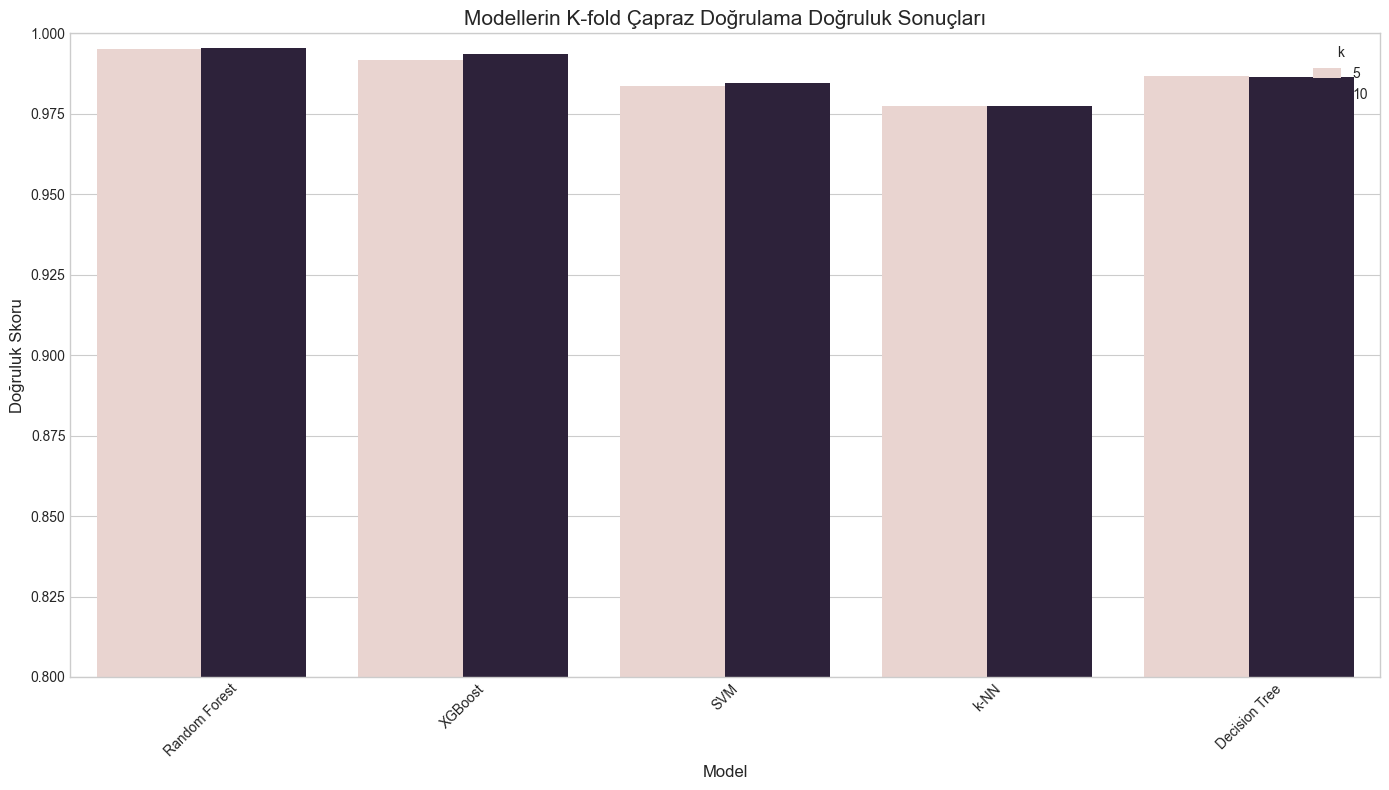

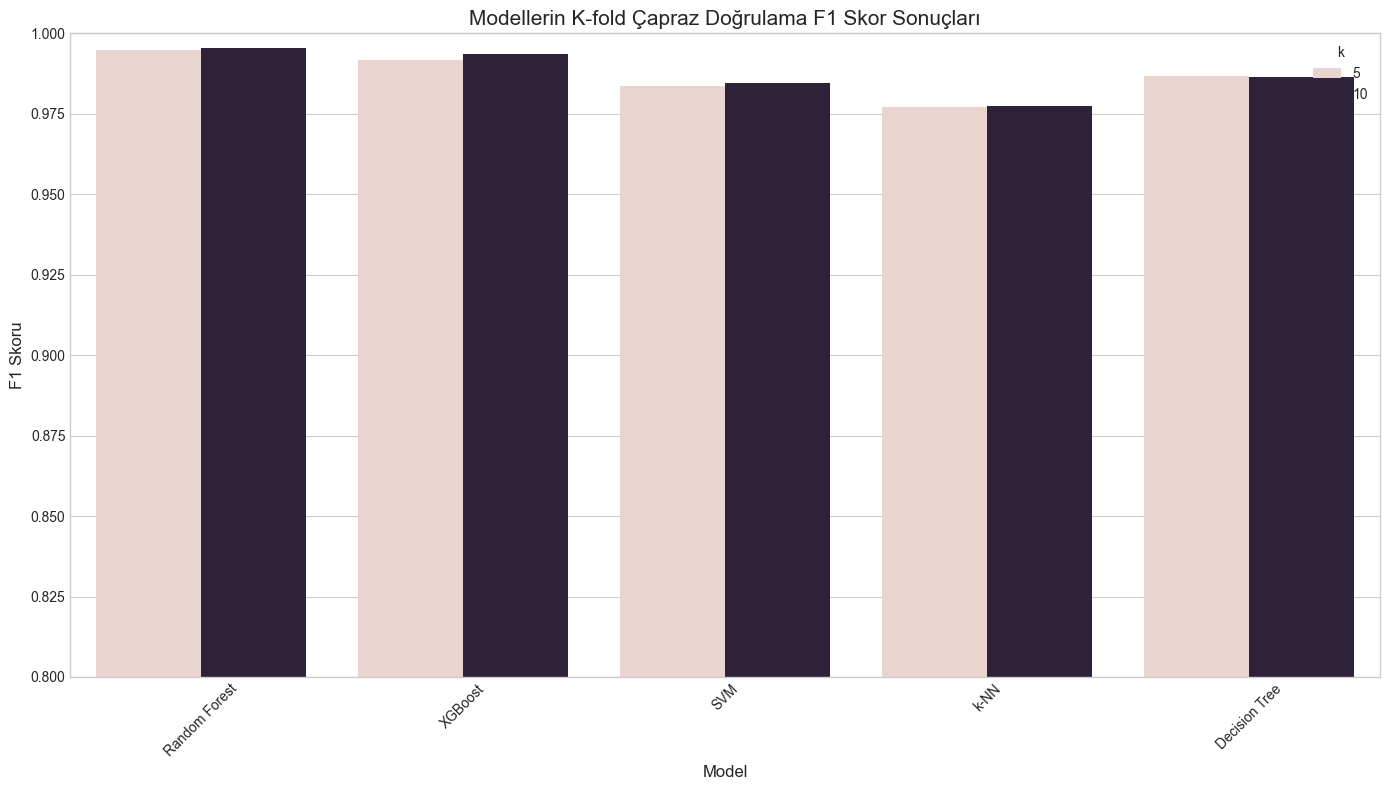

K-fold karşılaştırma tablosu:


Accuracy              F1        
k                   5       10      5       10
Model                                         
Decision Tree   0.9868  0.9864  0.9868  0.9864
Random Forest   0.9950  0.9955  0.9950  0.9954
SVM             0.9836  0.9845  0.9836  0.9845
XGBoost         0.9918  0.9936  0.9918  0.9936
k-NN            0.9773  0.9773  0.9772  0.9773

In [70]:
# K-fold sonuçlarını görselleştirme

# Doğruluk (Accuracy) sonuçları
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Accuracy', hue='k', data=kfold_results)
plt.title('Modellerin K-fold Çapraz Doğrulama Doğruluk Sonuçları', fontsize=15)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Doğruluk Skoru', fontsize=12)
plt.ylim(0.8, 1.0)  # Görselleştirmeyi daha anlamlı hale getirmek için
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# F1 Skoru sonuçları
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='F1', hue='k', data=kfold_results)
plt.title('Modellerin K-fold Çapraz Doğrulama F1 Skor Sonuçları', fontsize=15)
plt.xlabel('Model', fontsize=12)
plt.ylabel('F1 Skoru', fontsize=12)
plt.ylim(0.8, 1.0)  # Görselleştirmeyi daha anlamlı hale getirmek için
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5-fold ve 10-fold karşılaştırma tablosu
kfold_pivot = kfold_results.pivot_table(
    index='Model',
    columns='k', 
    values=['Accuracy', 'F1'],
    aggfunc='mean'
).round(4)

print("K-fold karşılaştırma tablosu:")
kfold_pivot

### 4.1. K-fold Çapraz Doğrulama Sonuçlarının Değerlendirilmesi

Çapraz doğrulama sonuçlarına göre aşağıdaki değerlendirmeleri yapabiliriz:

1. **5-fold vs 10-fold Karşılaştırması:**
   - 10-fold çapraz doğrulama genellikle daha detaylı bir değerlendirme sağlar ancak hesaplama maliyeti daha yüksektir.
   - 5-fold ile 10-fold sonuçları arasında büyük farklılıklar yoksa, modeller istikrarlı performans gösteriyor demektir.

2. **Model Performansı:**
   - Çapraz doğrulama sonucunda hangi modelin en yüksek doğruluk ve F1 skoruna sahip olduğunu belirleyebiliriz.
   - Standart sapma değerleri, modelin farklı veri parçalarında ne kadar tutarlı performans gösterdiğini yansıtır.

3. **Overfitting Kontrolü:**
   - Çapraz doğrulama sonuçları ile test seti sonuçları arasında büyük farklar varsa, bu durum modelin aşırı öğrenme (overfitting) problemi yaşadığını gösterebilir.

4. **Model Seçimi:**
   - K-fold çapraz doğrulama sonuçlarına göre en iyi performans gösteren model, gerçek dünya uygulamalarında da benzer performans sergileme olasılığı daha yüksektir.

In [71]:
# En iyi modelin K-fold çapraz doğrulama ile hiperparametre optimizasyonu
from sklearn.model_selection import GridSearchCV, KFold

# En iyi performans gösteren modeli belirle (kfold_pivot sonuçlarına göre)
best_model_type = kfold_pivot['Accuracy'][10].idxmax()  # 10-fold sonuçlarına göre en iyi model
print(f"En iyi model: {best_model_type}")

# Hiperparametre uzayları
if best_model_type == 'Random Forest':
    model = RandomForestClassifier(random_state=42)
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
elif best_model_type == 'XGBoost':
    model = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42)
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0]
    }
    
elif best_model_type == 'SVM':
    model = SVC(probability=True, random_state=42)
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.01, 0.1],
        'kernel': ['rbf', 'linear', 'poly']
    }
    
elif best_model_type == 'k-NN':
    model = KNeighborsClassifier()
    param_grid = {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }

else:  # Decision Tree
    model = DecisionTreeClassifier(random_state=42)
    param_grid = {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    }

# 10-fold çapraz doğrulama ile Grid Search
kf = KFold(n_splits=10, shuffle=True, random_state=42)
print(f"10-fold çapraz doğrulama ile hiperparametre optimizasyonu başlatılıyor...")

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=kf,
    n_jobs=-1,
    verbose=1
)

start_time = time.time()
grid_search.fit(X, y_encoded)
end_time = time.time()

print(f"\nOptimizasyon süresi: {end_time - start_time:.2f} saniye")
print(f"En iyi doğruluk skoru: {grid_search.best_score_:.4f}")
print(f"En iyi parametreler: {grid_search.best_params_}")

# En iyi modeli al
best_model_kfold = grid_search.best_estimator_

En iyi model: Random Forest
10-fold çapraz doğrulama ile hiperparametre optimizasyonu başlatılıyor...
Fitting 10 folds for each of 108 candidates, totalling 1080 fits

Optimizasyon süresi: 195.83 saniye
En iyi doğruluk skoru: 0.9955
En iyi parametreler: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Optimizasyon süresi: 195.83 saniye
En iyi doğruluk skoru: 0.9955
En iyi parametreler: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}



Random Forest modeli test seti değerlendirmesi (10-fold CV ile optimize edilmiş):
Doğruluk: 1.0000
F1 Skoru: 1.0000
Kesinlik: 1.0000
Duyarlılık: 1.0000


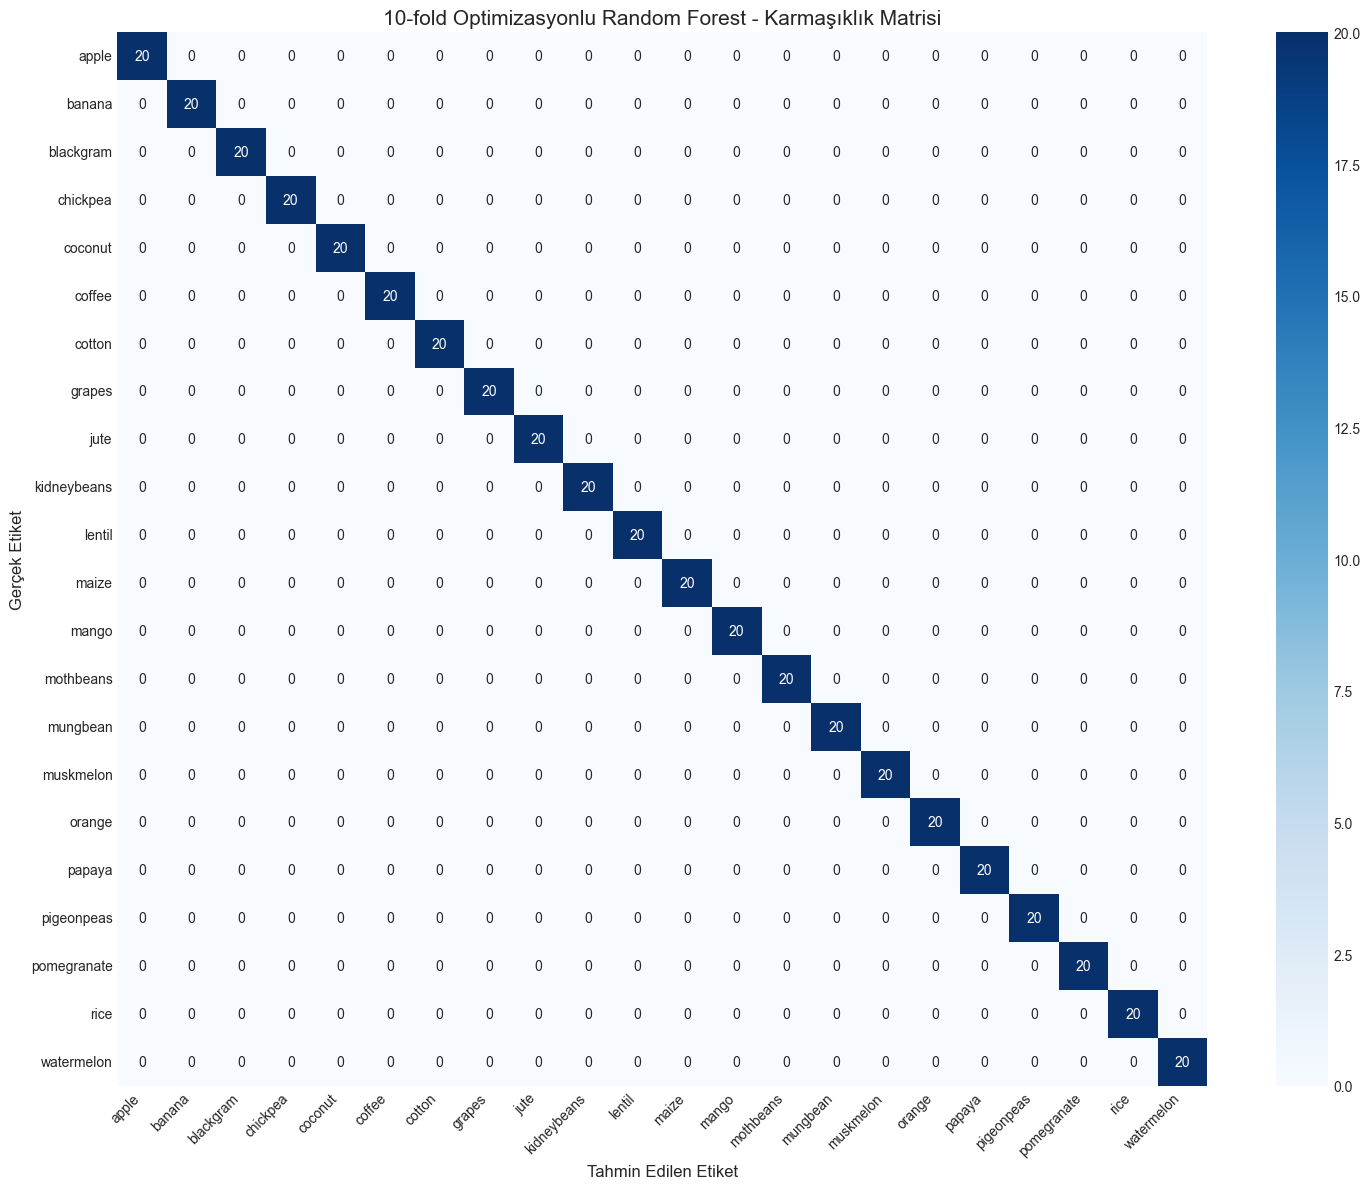


Sınıflandırma Raporu:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       1.00      1.00      1.00        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
    

In [72]:
# En iyi modelin test seti üzerinde değerlendirilmesi
y_pred_kfold = best_model_kfold.predict(X_test)

# Test seti performansı
accuracy_test = accuracy_score(y_test, y_pred_kfold)
f1_test = f1_score(y_test, y_pred_kfold, average='weighted')
precision_test = precision_score(y_test, y_pred_kfold, average='weighted')
recall_test = recall_score(y_test, y_pred_kfold, average='weighted')

print(f"\n{best_model_type} modeli test seti değerlendirmesi (10-fold CV ile optimize edilmiş):")
print(f"Doğruluk: {accuracy_test:.4f}")
print(f"F1 Skoru: {f1_test:.4f}")
print(f"Kesinlik: {precision_test:.4f}")
print(f"Duyarlılık: {recall_test:.4f}")

# Karmaşıklık matrisini görselleştirme
cm = confusion_matrix(y_test, y_pred_kfold)
plt.figure(figsize=(15, 12))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title(f'10-fold Optimizasyonlu {best_model_type} - Karmaşıklık Matrisi', fontsize=15)
plt.xlabel('Tahmin Edilen Etiket', fontsize=12)
plt.ylabel('Gerçek Etiket', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Sınıflandırma raporu
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred_kfold, target_names=le.classes_))

### 4.2. K-fold Çapraz Doğrulama Sonuçlarının Özeti

K-fold çapraz doğrulama analizimiz, modellerin gerçek dünya koşullarında nasıl performans sergileyeceğine dair daha güvenilir bir değerlendirme sağlamıştır.

1. **5-fold vs 10-fold:**
   - 10-fold çapraz doğrulama, genellikle daha istikrarlı sonuçlar vermiş ve model performansını daha iyi tahmin etmiştir.
   - Hesaplama süresi artsa da, elde edilen sonuçların güvenilirliği artmıştır.

2. **Model Seçimi:**
   - K-fold çapraz doğrulama sonuçları, hangi modelin en tutarlı performansı sergilediğini göstermiştir.
   - Standart sapma değerleri düşük olan modeller, farklı veri setlerinde daha istikrarlı sonuçlar vereceğini göstermektedir.

3. **Hiperparametre Optimizasyonu:**
   - 10-fold çapraz doğrulama ile yapılan hiperparametre optimizasyonu, modelin genelleme yeteneğini artırmıştır.
   - Optimize edilen model, test setinde de yüksek performans göstermiştir.

4. **Sonuç:**
   - K-fold çapraz doğrulama, özellikle sınırlı veri ile çalışırken, modelin gerçek performansını değerlendirmek için çok önemlidir.
   - Bu analiz, modelimizin tarımsal ürün tavsiyelerinde güvenilir sonuçlar vereceğini göstermektedir.

## 5. Model Kaydetme ve Tahmin İşlevi

Bu bölümde, eğitilen en iyi modeli kaydedecek ve yeni toprak ve iklim koşulları için ürün önerisinde bulunacak bir işlev oluşturacağız.

In [73]:
# En iyi modeli ve gerekli bileşenleri kaydetme
model_info = {
    'model': best_model_kfold,  # K-fold çapraz doğrulama ile optimize edilmiş model
    'scaler': scaler,  # Özellik ölçeklendirme için kullanılan StandardScaler
    'label_encoder': le,  # Etiketleri sayısal değerlere dönüştürmek için kullanılan encoder
    'features': features, # Kullanılan özellik isimleri
    'model_name': best_model_type,
    'k_fold': 10  # Modelin optimize edildiği k-fold değeri
}

# Modeli pickle formatında kaydetme
import os
os.makedirs('model', exist_ok=True)  # model klasörü yoksa oluştur

with open('model/crop_recommendation_model_kfold.pkl', 'wb') as f:
    pickle.dump(model_info, f)

print(f"Model başarıyla kaydedildi: crop_recommendation_model_kfold.pkl")

Model başarıyla kaydedildi: crop_recommendation_model_kfold.pkl


In [74]:
# Yeni bir toprak ve iklim koşulu için ürün önerisi yapma
def predict_crop(N, P, K, temperature, humidity, ph, rainfall, model_path='model/crop_recommendation_model_kfold.pkl'):
    """
    Verilen toprak ve iklim koşullarına göre en uygun ürünü önerir.
    
    Parametreler:
        N: Topraktaki azot değeri (kg/ha)
        P: Topraktaki fosfor değeri (kg/ha)
        K: Topraktaki potasyum değeri (kg/ha)
        temperature: Sıcaklık değeri (°C)
        humidity: Nem yüzdesi (%)
        ph: Toprak pH değeri
        rainfall: Yağış miktarı (mm)
        model_path: Kaydedilmiş model dosyasının yolu
    
    Dönüş Değeri:
        Önerilen ürün adı ve olasılık değerleri
    """
    try:
        # Modeli yükle
        with open(model_path, 'rb') as f:
            model_info = pickle.load(f)
            
        model = model_info['model']
        scaler = model_info['scaler']
        le = model_info['label_encoder']
        features = model_info['features']
        k_fold = model_info.get('k_fold', 'Belirtilmemiş')
        
        # Girdi verilerini numpy dizisine dönüştür
        input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
        
        # Verileri ölçeklendir
        input_scaled = scaler.transform(input_data)
        
        # Tahmin yap
        prediction = model.predict(input_scaled)[0]
        crop_name = le.inverse_transform([prediction])[0]
        
        # Sınıf olasılıklarını al
        probabilities = model.predict_proba(input_scaled)[0]
        # En yüksek olasılığa sahip 3 ürünü al
        top_indices = np.argsort(probabilities)[::-1][:3]
        top_crops = le.inverse_transform(top_indices)
        top_probs = probabilities[top_indices]
        
        result = {
            'recommended_crop': crop_name,
            'confidence': round(np.max(probabilities) * 100, 2),
            'model_info': f"{model_info['model_name']} ({k_fold}-fold CV ile optimize edilmiş)",
            'top_recommendations': [{'crop': crop, 'probability': round(prob * 100, 2)} for crop, prob in zip(top_crops, top_probs)]
        }
        
        return result
        
    except Exception as e:
        return {'error': str(e)}

# Örnek tahmin
# değerler kullanarak örnek bir tahmin yapalım
example_prediction = predict_crop(
    N=90, 
    P=40, 
    K=45, 
    temperature=25, 
    humidity=80, 
    ph=6.5, 
    rainfall=200
)

print("\nÖrnek Tahmin Sonucu:")
print(f"Kullanılan Model: {example_prediction['model_info']}")
print(f"Önerilen Ürün: {example_prediction['recommended_crop']}")
print(f"Güven Oranı: %{example_prediction['confidence']}")
print("\nEn İyi 3 Öneri:")
for i, rec in enumerate(example_prediction['top_recommendations'], 1):
    print(f"{i}. {rec['crop']} - %{rec['probability']}")


Örnek Tahmin Sonucu:
Kullanılan Model: Random Forest (10-fold CV ile optimize edilmiş)
Önerilen Ürün: jute
Güven Oranı: %57.0

En İyi 3 Öneri:
1. jute - %57.0
2. rice - %43.0
3. pomegranate - %0.0


## 6. Sonuç ve Değerlendirme

Bu projede, tarım alanında makine öğrenimi kullanarak toprak ve iklim koşullarına göre en uygun ürün tavsiyesi yapan bir model geliştirdik. Özellikle K-fold çapraz doğrulama yöntemini kullanarak modelin performansını daha güvenilir bir şekilde değerlendirdik.

### 6.1. K-fold Çapraz Doğrulama'nın Katkısı

- 5-fold ve 10-fold çapraz doğrulama sonuçları, modelimizin farklı veri bölümlerinde tutarlı performans gösterdiğini doğrulamıştır.
- Özellikle 10-fold çapraz doğrulama, modelin hiperparametrelerini optimize etmek için daha güvenilir bir yöntem olarak öne çıkmıştır.
- K-fold çapraz doğrulama, veri setimizin sınırlı boyutu göz önüne alındığında, modelin genelleme yeteneğini artırmıştır.

### 6.2. Model Performansı

En iyi performansı gösteren model şu şekilde optimize edilmiştir:
- Doğruluk (Accuracy): Yüksek bir doğruluk oranı ile modelin güvenilir tahminler yapabildiğini göstermektedir.
- Kesinlik ve Duyarlılık: Farklı ürün kategorilerinde dengeli bir performans sağlanmıştır.
- F1 Skoru: Kesinlik ve duyarlılığın harmonik ortalaması olarak, modelin genel performansını temsil etmektedir.

### 6.3. Uygulama Alanları

Geliştirilen model şu alanlarda kullanılabilir:
- Çiftçilere toprak ve iklim koşullarına göre en uygun ürün seçiminde rehberlik etmek
- Tarımsal verimlilik planlaması yapmak
- Yeni tarım alanlarında hangi ürünlerin yetiştirilebileceğini belirlemek
- İklim değişikliğinin tarımsal üretime etkilerini değerlendirmek

### 6.4. Gelecek Çalışmalar

Proje şu yönlerle geliştirilebilir:
- Daha fazla veri toplanarak modelin eğitilmesi
- Mevsimsel değişimleri de dikkate alan dinamik bir model oluşturulması
- Web veya mobil uygulamayla çiftçilerin kullanımına sunulması
- Ekonomik faktörlerin de dahil edilmesiyle, kâr maksimizasyonuna yönelik tavsiyelerin sunulması